# I. Lấy thông tin Books

## 1. Khai báo thư viện 

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import math
# Nhúng hình ảnh, đồ thị trong notebook
%matplotlib inline

In [2]:
import pickle
from pathlib import Path
import numpy as np

## 2. Lấy tên tác giả và nội dung của quyển sách

In [3]:
def GetAuthor(searchfile):
    tg1=""
    NumLine = 0
    for line in searchfile:
        NumLine = NumLine+1
        if NumLine<100:
            if "author:" in line.lower(): 
                tg = line.split(' ')
                tg1=""
                for i in range(1,len(tg)):
                    if i<len(tg)-1:
                        tg1 +=tg[i]+" "
                    else:
                        tg1 +=tg[i]
                return tg1.strip()       
            else:
                if "edited by" in line.lower():
                    tg = line.split(' ')
                    bien=0;
                    for n in range(len(tg)-1):
                        if tg[n].lower()=="edited"and tg[n+1].lower()=="by":
                            bien=n+1
                    tg1=""
                    if tg[bien].lower() == "by" and len(tg)<8:
                        for i in range(bien+1,len(tg)):
                            if i<len(tg)-1:
                                tg1 +=tg[i]+" "
                            else:
                                tg1 +=tg[i]
                        return tg1.strip()
                else:
                    if "by" in line.lower():
                        tg = line.split(' ')
                   
                        tg1=""
                        if tg[0].lower() == "by" and len(tg)<8:
                            for i in range(1,len(tg)):
                                if i<len(tg)-1:
                                    tg1 +=tg[i]+" "
                                else:
                                    tg1 +=tg[i]
                            return tg1.strip()

In [4]:
def load_FileTxt(folder):
    sequence_folder = glob.glob(os.path.join(folder, '*/*.txt'))
    Text = []
    TenFile = []
    NumFile = 0
    DiaChi = []
    TacGia = []
    #FileError =[]
    for sq in sequence_folder:
        sq = sq.replace('\\', '/')
        TenFile1 = sq.split('/')[-1]
        NoiDung=""
        try:
            file = open(sq, 'r')
            tg = GetAuthor(file)
            NoiDung = file.read()
            file.close()
        except UnicodeDecodeError:
            #FileError.append(sq)
            #os.remove(sq)
            print(TenFile1)
        Text.append(NoiDung)
        #print(headers)
        DiaChi.append(sq)
        TenFile.append(TenFile1)
        TacGia.append(tg)
        NumFile = NumFile + 1
    return TenFile,TacGia,NumFile,DiaChi,Text

In [5]:
DiaChiFolder = "F:/8_Machine Learning/Bai tap Deeplearning/3_AuthorClassification/Books/"

In [6]:
TenFile,TacGia,NumFile,DiaChi,Text = load_FileTxt(DiaChiFolder)

In [7]:
DataF = pd.DataFrame(TenFile, columns=["TenFile"])

In [8]:
DataF["TacGia"]=pd.DataFrame(TacGia, columns=["TacGia"])

In [9]:
DataF["NoiDung"]=pd.DataFrame(Text, columns=["NoiDung"])

In [10]:
DataF["DiaChiFile"]=pd.DataFrame(DiaChi, columns=["DiaChiFile"])

In [11]:
DataF.head(20)

,TenFile,TacGia,NoiDung,DiaChiFile
0,01frd10.txt,Thomas Carlyle,"\nMarch, 2000 [Etext #2101]\n[Date last updat...",F:/8_Machine Learning/Bai tap Deeplearning/3_A...
1,02frd10.txt,Thomas Carlyle,"\nMarch, 2000 [Etext #2102]\n\n\nProject Gute...",F:/8_Machine Learning/Bai tap Deeplearning/3_A...
2,02tom10.txt,Victor Appleton,"\nAugust, 2000 [Etext #2273]\n\n\n**The Proje...",F:/8_Machine Learning/Bai tap Deeplearning/3_A...
3,03frd10.txt,Thomas Carlyle,"\nMarch, 2000 [Etext #2103]\n\n\nProject Gute...",F:/8_Machine Learning/Bai tap Deeplearning/3_A...
4,04frd10.txt,Thomas Carlyle,"\nMarch, 2000 [Etext #2104]\n\n\nProject Gute...",F:/8_Machine Learning/Bai tap Deeplearning/3_A...
5,05frd10.txt,Thomas Carlyle,"\nMarch, 2000 [Etext #2105]\n\n\nProject Gute...",F:/8_Machine Learning/Bai tap Deeplearning/3_A...
6,06frd10.txt,Thomas Carlyle,"\nMarch, 2000 [Etext #2106]\n\n\nProject Gute...",F:/8_Machine Learning/Bai tap Deeplearning/3_A...
7,07frd10.txt,Thomas Carlyle,"\nMarch, 2000 [Etext #2107]\n\n\nProject Gute...",F:/8_Machine Learning/Bai tap Deeplearning/3_A...
8,08frd10.txt,Thomas Carlyle,"\nMarch, 2000 [Etext #2108]\n\n\nProject Gute...",F:/8_Machine Learning/Bai tap Deeplearning/3_A...
9,09frd10.txt,Thomas Carlyle,"\nMarch, 2000 [Etext #2109]\n\n\nProject Gute...",F:/8_Machine Learning/Bai tap Deeplearning/3_A...


In [12]:
DataF.shape

(8936, 4)

In [13]:
#Kiểm tra có bao nhiêu Rows không lấy được tác giả

In [14]:
pd.isnull(DataF).sum()

TenFile         0
TacGia        443
NoiDung         0
DiaChiFile      0
dtype: int64

In [15]:
#Xóa các dòng có giá trị Null

In [16]:
DataF1=DataF.dropna()

In [17]:
DataF1.shape

(8493, 4)

In [18]:
DataProcess = DataF1

In [19]:
DataProcess.drop(columns=['TenFile','DiaChiFile'], inplace=True)

C:\Users\vuong.huynh\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [20]:
#DataProcess.drop(columns=['Count'], inplace=True)

In [21]:
#Tạo DataFrame chỉ có tác giả và nội dung ==> Để Classification tác giả

In [22]:
DataProcess.head()

,TacGia,NoiDung
0,Thomas Carlyle,"\nMarch, 2000 [Etext #2101]\n[Date last updat..."
1,Thomas Carlyle,"\nMarch, 2000 [Etext #2102]\n\n\nProject Gute..."
2,Victor Appleton,"\nAugust, 2000 [Etext #2273]\n\n\n**The Proje..."
3,Thomas Carlyle,"\nMarch, 2000 [Etext #2103]\n\n\nProject Gute..."
4,Thomas Carlyle,"\nMarch, 2000 [Etext #2104]\n\n\nProject Gute..."


In [23]:
DataProcess1=DataProcess

In [24]:
DataProcess1.shape

(8493, 2)

In [25]:
tga=DataProcess1['TacGia'].value_counts()

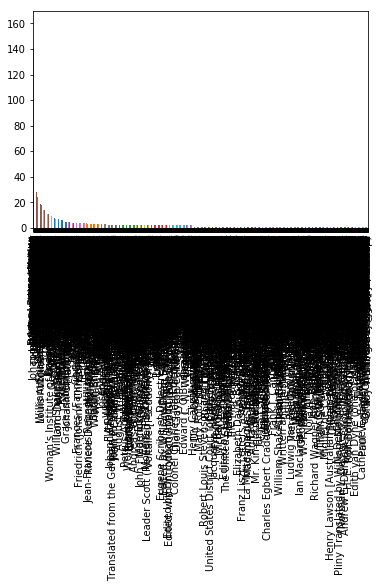

In [26]:
tga.plot.bar()

In [27]:
DataProcess1.head()

,TacGia,NoiDung
0,Thomas Carlyle,"\nMarch, 2000 [Etext #2101]\n[Date last updat..."
1,Thomas Carlyle,"\nMarch, 2000 [Etext #2102]\n\n\nProject Gute..."
2,Victor Appleton,"\nAugust, 2000 [Etext #2273]\n\n\n**The Proje..."
3,Thomas Carlyle,"\nMarch, 2000 [Etext #2103]\n\n\nProject Gute..."
4,Thomas Carlyle,"\nMarch, 2000 [Etext #2104]\n\n\nProject Gute..."


In [28]:
#Cách vừa Groupby vừa lọc dữ liệu
counts = DataProcess1['TacGia'].value_counts()
DataProcess2 = DataProcess1[DataProcess1['TacGia'].isin(counts[counts>20].index)]

In [29]:
counts2 = DataProcess2['TacGia'].value_counts()
DataProcess2 = DataProcess2[DataProcess2['TacGia'].isin(counts2[counts2<25].index)]

In [30]:
#Cách vừa Groupby vừa lọc dữ liệu
#DataProcess2 = DataProcess1.groupby('TacGia').filter(lambda x: len(x)>2)

In [31]:
DataProcess2.head()

,TacGia,NoiDung
2,Victor Appleton,"\nAugust, 2000 [Etext #2273]\n\n\n**The Proje..."
351,Edgar Rice Burroughs,(#8 in The Tarzan Tales by Edgar Rice Burrough...
364,Oscar Wilde,"\nFebruary, 2000 [Etext #2061]\n\n\nProject Gu..."
497,E. Phillips Oppenheim,"\nAugust, 2001 [Etext #2767]\n[Date last upda..."
523,Sir Walter Scott,"\nApril, 2001 [Etext #2590]\n\n\nThe Project ..."


In [32]:
DataProcess2.shape

(401, 2)

In [33]:
tga2=DataProcess2['TacGia'].value_counts()

In [34]:
tga2

Sir Walter Scott         24
Wilkie Collins           24
Victor Appleton          24
Anonymous                23
E. Phillips Oppenheim    23
Victor Hugo              23
Mrs. Humphry Ward        23
Upton Sinclair           23
Thomas H. Huxley         22
Theodor Storm            22
Edward Bulwer Lytton     22
Huguette Bertrand        22
Edgar Rice Burroughs     21
Paul Heyse               21
L. Frank Baum            21
Oscar Wilde              21
Walter Horatio Pater     21
David Widger             21
Name: TacGia, dtype: int64

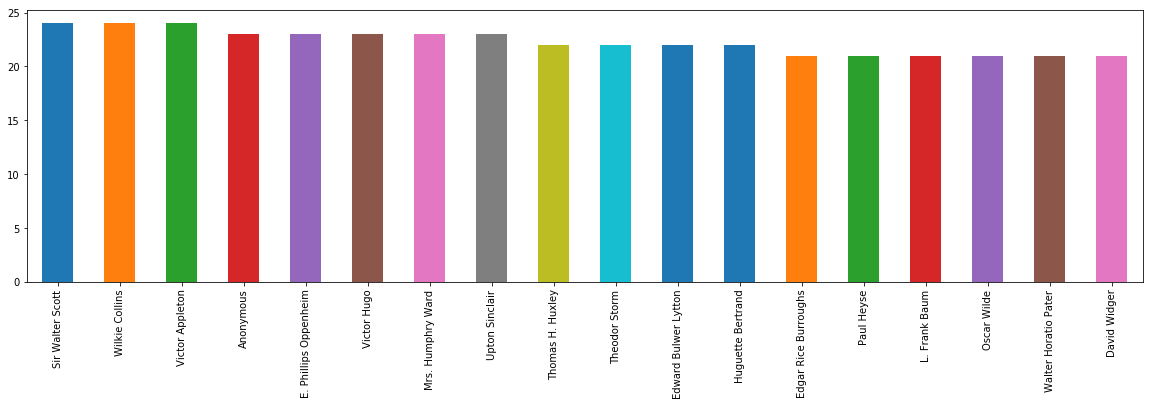

In [35]:
plt.figure(figsize =(20,5))
tga2.plot.bar()
#plt.show()

# II. Xử lý nội dung quyển sách

## 1. Xử lý nội dung

In [36]:
DataProcess2['NoiDung'] = DataProcess2['NoiDung'].str.lower()

In [37]:
DataProcess2.head()

,TacGia,NoiDung
2,Victor Appleton,"\naugust, 2000 [etext #2273]\n\n\n**the proje..."
351,Edgar Rice Burroughs,(#8 in the tarzan tales by edgar rice burrough...
364,Oscar Wilde,"\nfebruary, 2000 [etext #2061]\n\n\nproject gu..."
497,E. Phillips Oppenheim,"\naugust, 2001 [etext #2767]\n[date last upda..."
523,Sir Walter Scott,"\napril, 2001 [etext #2590]\n\n\nthe project ..."


In [38]:
DataProcess2.shape

(401, 2)

In [39]:
#Code bị lỗi không sử dụng được
#Loại bỏ các ký tự ngoài A-Z, a-z, 0-9 (Regular expression operation)
#import re
#DataProcess2['NoiDung'] = re.sub('[^A-Za-z]', '', DataProcess2['NoiDung'])

In [40]:
def preprocess_text(sent):
    sent = str(sent)
    sent = sent.lower()
    sent = re.sub(r"what's", "what is ", sent)
    sent = re.sub(r"\'s", " ", sent)
    sent = re.sub(r"\'ve", " have ", sent)
    sent = re.sub(r"can't", "cannot ", sent)
    sent = re.sub(r"n't", " not ", sent)
    sent = re.sub(r"i'm", "i am ", sent)
    sent = re.sub(r"\'re", " are ", sent)
    sent = re.sub(r"\'d", " would ", sent)
    sent = re.sub(r"\'ll", " will ", sent)
    sent = re.sub(r",", " ", sent)
    sent = re.sub(r"\.", " ", sent)
    sent = re.sub(r"!", " ! ", sent)
    sent = re.sub(r"\/", " ", sent)
    sent = re.sub(r"\^", " ^ ", sent)
    sent = re.sub(r"\+", " + ", sent)
    sent = re.sub(r"\-", " - ", sent)
    sent = re.sub(r"\=", " = ", sent)
    sent = re.sub(r"'", " ", sent)
    sent = sent.split()
    return sent

In [46]:
# Bỏ ký tự đặt biệt
DataProcess2['NoiDung'] = DataProcess2['NoiDung'].str.replace('\@', '')
DataProcess2['NoiDung'] = DataProcess2['NoiDung'].str.replace('\*', '')
DataProcess2['NoiDung'] = DataProcess2['NoiDung'].str.replace('\#', '')

In [47]:
DataProcess2.head()

,TacGia,NoiDung
2,Victor Appleton,"\naugust, 2000 [etext 2273]\n\n\nthe project ..."
351,Edgar Rice Burroughs,(8 in the tarzan tales by edgar rice burroughs...
364,Oscar Wilde,"\nfebruary, 2000 [etext 2061]\n\n\nproject gut..."
497,E. Phillips Oppenheim,"\naugust, 2001 [etext 2767]\n[date last updat..."
523,Sir Walter Scott,"\napril, 2001 [etext 2590]\n\n\nthe project g..."


In [48]:
DataProcess2['NoiDung1']=DataProcess2['NoiDung']

In [49]:
# Bỏ ký tự xuống dòng, về đầu dòng
DataProcess2['NoiDung'] = DataProcess2['NoiDung'].str.replace('\r', '')
DataProcess2['NoiDung'] = DataProcess2['NoiDung'].str.replace('\n', ' ')

In [50]:
DataProcess2.head()

,TacGia,NoiDung,NoiDung1
2,Victor Appleton,"august, 2000 [etext 2273] the project gute...","\naugust, 2000 [etext 2273]\n\n\nthe project ..."
351,Edgar Rice Burroughs,(8 in the tarzan tales by edgar rice burroughs...,(8 in the tarzan tales by edgar rice burroughs...
364,Oscar Wilde,"february, 2000 [etext 2061] project gutenbe...","\nfebruary, 2000 [etext 2061]\n\n\nproject gut..."
497,E. Phillips Oppenheim,"august, 2001 [etext 2767] [date last updated...","\naugust, 2001 [etext 2767]\n[date last updat..."
523,Sir Walter Scott,"april, 2001 [etext 2590] the project guten...","\napril, 2001 [etext 2590]\n\n\nthe project g..."


In [51]:
#Bỏ ký tự có 's,chuyển đổi chữ phủ định, ký tự
DataProcess2['NoiDung'] = DataProcess2['NoiDung'].str.replace("what's", "what is ")
DataProcess2['NoiDung'] = DataProcess2['NoiDung'].str.replace("\'ve", " have ")
DataProcess2['NoiDung'] = DataProcess2['NoiDung'].str.replace("can't", "cannot ")
DataProcess2['NoiDung'] = DataProcess2['NoiDung'].str.replace("n't", " not ")
DataProcess2['NoiDung'] = DataProcess2['NoiDung'].str.replace("i'm", "i am ")
DataProcess2['NoiDung'] = DataProcess2['NoiDung'].str.replace("\'re", " are ")

DataProcess2['NoiDung'] = DataProcess2['NoiDung'].str.replace("\'d", " would ")
DataProcess2['NoiDung'] = DataProcess2['NoiDung'].str.replace("\'ll", " will ")

In [52]:
DataProcess2.head()

,TacGia,NoiDung,NoiDung1
2,Victor Appleton,"august, 2000 [etext 2273] the project gute...","\naugust, 2000 [etext 2273]\n\n\nthe project ..."
351,Edgar Rice Burroughs,(8 in the tarzan tales by edgar rice burroughs...,(8 in the tarzan tales by edgar rice burroughs...
364,Oscar Wilde,"february, 2000 [etext 2061] project gutenbe...","\nfebruary, 2000 [etext 2061]\n\n\nproject gut..."
497,E. Phillips Oppenheim,"august, 2001 [etext 2767] [date last updated...","\naugust, 2001 [etext 2767]\n[date last updat..."
523,Sir Walter Scott,"april, 2001 [etext 2590] the project guten...","\napril, 2001 [etext 2590]\n\n\nthe project g..."


In [53]:
DataProcess2['NoiDung'] = DataProcess2['NoiDung'].str.replace("\"", " ")
DataProcess2['NoiDung'] = DataProcess2['NoiDung'].str.replace("\."," . ")
DataProcess2['NoiDung'] = DataProcess2['NoiDung'].str.replace("\,"," ")
DataProcess2['NoiDung'] = DataProcess2['NoiDung'].str.replace("!", " ! ")
DataProcess2['NoiDung'] = DataProcess2['NoiDung'].str.replace("\/", "  ")
DataProcess2['NoiDung'] = DataProcess2['NoiDung'].str.replace("\^", " ^ ")
DataProcess2['NoiDung'] = DataProcess2['NoiDung'].str.replace("\+", " + ")

DataProcess2['NoiDung'] = DataProcess2['NoiDung'].str.replace("\'", '')
DataProcess2['NoiDung'] = DataProcess2['NoiDung'].str.replace("\-", " - ")
DataProcess2['NoiDung'] = DataProcess2['NoiDung'].str.replace("\=", " = ")
DataProcess2['NoiDung'] = DataProcess2['NoiDung'].str.replace("'", " ")

In [54]:
DataProcess2.head()

,TacGia,NoiDung,NoiDung1
2,Victor Appleton,august 2000 [etext 2273] the project gute...,"\naugust, 2000 [etext 2273]\n\n\nthe project ..."
351,Edgar Rice Burroughs,(8 in the tarzan tales by edgar rice burroughs...,(8 in the tarzan tales by edgar rice burroughs...
364,Oscar Wilde,february 2000 [etext 2061] project gutenbe...,"\nfebruary, 2000 [etext 2061]\n\n\nproject gut..."
497,E. Phillips Oppenheim,august 2001 [etext 2767] [date last updated...,"\naugust, 2001 [etext 2767]\n[date last updat..."
523,Sir Walter Scott,april 2001 [etext 2590] the project guten...,"\napril, 2001 [etext 2590]\n\n\nthe project g..."


In [55]:
#Save DataFrame để lần sau sử dụng

In [56]:
#DataProcess2.to_csv('F:/8_Machine Learning/Bai tap Deeplearning/3_AuthorClassification/DataProcess.csv',sep='\t',encoding ='utf-8')

In [57]:
#Remove the stop words

In [58]:
#import nltk
#nltk.download('punkt')

In [59]:
#from nltk.tokenize import word_tokenize
#NoiDungTokenize= word_tokenize(DataProcess2['NoiDung'])

nltk.download('punkt') : There are number of datasets available in nltk, such as movie review data, names data and etc. The punkt dataset is one of the them and it's required to train the tokenizers in nltk.
word_tokenize: This tokenizer will tokenize the text, and create a list of words.

Since we got the list of words, it's time to remove the stop words in the list words

In [60]:
#nltk.download('stopwords')
#from nltk.corpus import stopwords 
#for word in NoiDungTokenize:
#    if word in stopwords.words('english'):
#        NoiDungTokenize.remove(word)

In [61]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vuong.huynh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [62]:
#Stopword của Sklearn
#from sklearn.feature_extraction import text
#stop = text.ENGLISH_STOP_WORDS

In [63]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [64]:
DataProcess2['NoiDungTokenize']=DataProcess2['NoiDung'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [65]:
DataProcess2.head(10)

,TacGia,NoiDung,NoiDung1,NoiDungTokenize
2,Victor Appleton,august 2000 [etext 2273] the project gute...,"\naugust, 2000 [etext 2273]\n\n\nthe project ...",august 2000 [etext 2273] project gutenberg ete...
351,Edgar Rice Burroughs,(8 in the tarzan tales by edgar rice burroughs...,(8 in the tarzan tales by edgar rice burroughs...,(8 tarzan tales edgar rice burroughs) copyrigh...
364,Oscar Wilde,february 2000 [etext 2061] project gutenbe...,"\nfebruary, 2000 [etext 2061]\n\n\nproject gut...",february 2000 [etext 2061] project gutenbergs ...
497,E. Phillips Oppenheim,august 2001 [etext 2767] [date last updated...,"\naugust, 2001 [etext 2767]\n[date last updat...",august 2001 [etext 2767] [date last updated: f...
523,Sir Walter Scott,april 2001 [etext 2590] the project guten...,"\napril, 2001 [etext 2590]\n\n\nthe project g...",april 2001 [etext 2590] project gutenberg etex...
526,Victor Hugo,april 2001 [etext 2610] the project guten...,"\napril, 2001 [etext 2610]\n\n\nthe project g...",april 2001 [etext 2610] project gutenberg etex...
549,Edward Bulwer Lytton,january 2001 [etext 2461] project gutenbe...,"\njanuary, 2001 [etext 2461]\n\n\nproject gut...",january 2001 [etext 2461] project gutenberg et...
610,Sir Walter Scott,february 2000 [etext 2516] the project gu...,"\nfebruary, 2000 [etext 2516]\n\n\nthe projec...",february 2000 [etext 2516] project gutenberg e...
645,Thomas H. Huxley,release date: november 2001 [etext 2921] [...,"\nrelease date: november, 2001 [etext 2921]\...",release date: november 2001 [etext 2921] [yes ...
646,Thomas H. Huxley,release date: november 2001 [etext 2922] [...,"\nrelease date: november, 2001 [etext 2922]\...",release date: november 2001 [etext 2922] [yes ...


In [66]:
DataTrain = DataProcess2

In [ ]:
#DataTrain.to_csv('F:/8_Machine Learning/Bai tap Deeplearning/3_AuthorClassification/DataTrainNew.csv',sep='\t',encoding ='utf-8')

In [67]:
DataTrain.to_csv('F:/8_Machine Learning/Bai tap Deeplearning/3_AuthorClassification/DataTrainNew1.csv',encoding ='utf-8')

In [3]:
DataTrain = pd.read_csv('F:/8_Machine Learning/Bai tap Deeplearning/3_AuthorClassification/DataTrainNew1.csv')

In [68]:
DataTrain.head()

,TacGia,NoiDung,NoiDung1,NoiDungTokenize
2,Victor Appleton,august 2000 [etext 2273] the project gute...,"\naugust, 2000 [etext 2273]\n\n\nthe project ...",august 2000 [etext 2273] project gutenberg ete...
351,Edgar Rice Burroughs,(8 in the tarzan tales by edgar rice burroughs...,(8 in the tarzan tales by edgar rice burroughs...,(8 tarzan tales edgar rice burroughs) copyrigh...
364,Oscar Wilde,february 2000 [etext 2061] project gutenbe...,"\nfebruary, 2000 [etext 2061]\n\n\nproject gut...",february 2000 [etext 2061] project gutenbergs ...
497,E. Phillips Oppenheim,august 2001 [etext 2767] [date last updated...,"\naugust, 2001 [etext 2767]\n[date last updat...",august 2001 [etext 2767] [date last updated: f...
523,Sir Walter Scott,april 2001 [etext 2590] the project guten...,"\napril, 2001 [etext 2590]\n\n\nthe project g...",april 2001 [etext 2590] project gutenberg etex...


In [42]:
DataTrain.shape

(401, 5)

In [69]:
countsTG = DataTrain['TacGia'].value_counts()

In [70]:
countsTG.shape

(18,)

# III. Training 

## 1. Bag of word 

In [6]:
from sklearn.model_selection import train_test_split
# Chia tập dữ liệu thành 2 tập (train, test) theo tỉ lệ 80% cho tập train 20% cho tập test
X_trainBOW, X_testBOW, y_trainBOW, y_testBOW = train_test_split(DataTrain.NoiDungTokenize, DataTrain.TacGia, test_size=0.2, random_state=12)

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()

In [8]:
count_vect.fit(X_trainBOW)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [9]:
X_train_BOW = count_vect.transform(X_trainBOW)

In [10]:
X_train_BOW

<320x178405 sparse matrix of type '<class 'numpy.int64'>'
	with 1904107 stored elements in Compressed Sparse Row format>

In [11]:
#X_train_BOW = count_vect.fit_transform(X_trainBOW)

In [12]:
X_test_BOW = count_vect.transform(X_testBOW)

In [13]:
X_test_BOW

<81x178405 sparse matrix of type '<class 'numpy.int64'>'
	with 468247 stored elements in Compressed Sparse Row format>

In [78]:
#from sklearn.feature_extraction.text import CountVectorizer
#count_vect = CountVectorizer()
#count_vect.fit(DataTrain.NoiDungTokenize)

In [79]:
#X_train_BOW = count_vect.transform(X_trainBOW)
#X_test_BOW = count_vect.transform(X_testBOW)
print("X_train_BOW:",X_train_BOW.shape,"X_test_BOW:",X_test_BOW.shape)

X_train_BOW: (320, 178405) X_test_BOW: (81, 178405)


### 1.1 Naive baye

In [12]:
from sklearn.naive_bayes import MultinomialNB
MulNB_BOW = MultinomialNB()

In [81]:
MulNB_BOW.fit(X_train_BOW, y_trainBOW)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [82]:
#PreMulNB_BOW = MulNB_BOW.predict(X_test_BOW.toarray())

In [83]:
PreMulNB_BOW = MulNB_BOW.predict(X_test_BOW)

In [84]:
from sklearn.metrics import classification_report
print(classification_report(y_testBOW, PreMulNB_BOW))

                       precision    recall  f1-score   support

            Anonymous       1.00      1.00      1.00         1
         David Widger       1.00      0.33      0.50         3
E. Phillips Oppenheim       1.00      1.00      1.00         3
 Edgar Rice Burroughs       1.00      1.00      1.00         4
 Edward Bulwer Lytton       1.00      0.60      0.75         5
    Huguette Bertrand       1.00      0.83      0.91         6
        L. Frank Baum       1.00      1.00      1.00         7
    Mrs. Humphry Ward       0.75      1.00      0.86         3
          Oscar Wilde       1.00      0.33      0.50         3
           Paul Heyse       1.00      1.00      1.00         5
     Sir Walter Scott       0.86      1.00      0.92         6
        Theodor Storm       1.00      1.00      1.00         7
     Thomas H. Huxley       1.00      0.40      0.57         5
       Upton Sinclair       0.83      0.83      0.83         6
      Victor Appleton       1.00      1.00      1.00  

In [13]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import GridSearchCV

In [86]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect1 = CountVectorizer(stop_words="english", analyzer='word',ngram_range=(1, 1))
count_vect1.fit(X_trainBOW)
X_train_BOW1 = count_vect1.transform(X_trainBOW)
X_test_BOW1 = count_vect1.transform(X_testBOW)

In [87]:
pipelineMulBOW1 = Pipeline([('clf1', OneVsRestClassifier(MultinomialNB(fit_prior=True, class_prior=None))),])
parametersMulBOW1 = {'clf1__estimator__alpha': (1e-2, 1e-3)}

In [88]:
grid_search_tuneMulBOW1 = GridSearchCV(pipelineMulBOW1, parametersMulBOW1, cv=2, n_jobs=2, verbose=3)

In [89]:
grid_search_tuneMulBOW1.fit(X_train_BOW1, y_trainBOW)

Fitting 2 folds for each of 2 candidates, totalling 4 fits


[Parallel(n_jobs=2)]: Done   4 out of   4 | elapsed:    6.2s finished


GridSearchCV(cv=2, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('clf1', OneVsRestClassifier(estimator=MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True),
          n_jobs=1))]),
       fit_params=None, iid=True, n_jobs=2,
       param_grid={'clf1__estimator__alpha': (0.01, 0.001)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [90]:
print("Best parameters:",grid_search_tuneMulBOW1.best_estimator_.steps)
best_clfMulBOW1 = grid_search_tuneMulBOW1.best_estimator_
predictionsMulBOW1 = best_clfMulBOW1.predict(X_test_BOW1)
from sklearn.metrics import classification_report
print(classification_report(y_testBOW, predictionsMulBOW1))

Best parameters: [('clf1', OneVsRestClassifier(estimator=MultinomialNB(alpha=0.001, class_prior=None, fit_prior=True),
          n_jobs=1))]
                       precision    recall  f1-score   support

            Anonymous       1.00      1.00      1.00         1
         David Widger       1.00      0.67      0.80         3
E. Phillips Oppenheim       1.00      1.00      1.00         3
 Edgar Rice Burroughs       1.00      1.00      1.00         4
 Edward Bulwer Lytton       1.00      0.80      0.89         5
    Huguette Bertrand       0.00      0.00      0.00         6
        L. Frank Baum       1.00      0.86      0.92         7
    Mrs. Humphry Ward       1.00      1.00      1.00         3
          Oscar Wilde       1.00      0.67      0.80         3
           Paul Heyse       0.00      0.00      0.00         5
     Sir Walter Scott       1.00      1.00      1.00         6
        Theodor Storm       0.58      1.00      0.74         7
     Thomas H. Huxley       1.00      1

C:\Users\vuong.huynh\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [91]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect2 = CountVectorizer(stop_words="english", analyzer='word',ngram_range=(1, 2))
count_vect2.fit(X_trainBOW)
X_train_BOW2 = count_vect2.transform(X_trainBOW)
X_test_BOW2 = count_vect2.transform(X_testBOW)

In [92]:
pipelineMulBOW2 = Pipeline([('clf2', OneVsRestClassifier(MultinomialNB(fit_prior=True, class_prior=None))),])
parametersMulBOW2 = {'clf2__estimator__alpha': (1e-2, 1e-3)}
grid_search_tuneMulBOW2 = GridSearchCV(pipelineMulBOW2, parametersMulBOW2, cv=2, n_jobs=2, verbose=3)

In [ ]:
grid_search_tuneMulBOW2.fit(X_train_BOW2, y_trainBOW)

Fitting 2 folds for each of 2 candidates, totalling 4 fits


In [ ]:
print("Best parameters:",grid_search_tuneMulBOW2.best_estimator_.steps)
best_clfMulBOW2 = grid_search_tuneMulBOW2.best_estimator_
predictionsMulBOW2 = best_clfMulBOW2.predict(X_test_BOW2)
from sklearn.metrics import classification_report
print(classification_report(y_testBOW, predictionsMulBOW2))

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect3 = CountVectorizer(stop_words="english", analyzer='word',ngram_range=(1, 3))
count_vect3.fit(X_trainBOW)
X_train_BOW3 = count_vect3.transform(X_trainBOW)
X_test_BOW3 = count_vect3.transform(X_testBOW)

In [ ]:
pipelineMulBOW3 = Pipeline([('clf3', OneVsRestClassifier(MultinomialNB(fit_prior=True, class_prior=None))),])
parametersMulBOW3 = {'clf3__estimator__alpha': (1e-2, 1e-3)}
grid_search_tuneMulBOW3 = GridSearchCV(pipelineMulBOW3, parametersMulBOW3, cv=2, n_jobs=2, verbose=3)

In [ ]:
grid_search_tuneMulBOW3.fit(X_train_BOW3, y_trainBOW)

In [ ]:
print("Best parameters:",grid_search_tuneMulBOW3.best_estimator_.steps)
best_clfMulBOW3 = grid_search_tuneMulBOW3.best_estimator_
predictionsMulBOW3 = best_clfMulBOW3.predict(X_test_BOW3)
from sklearn.metrics import classification_report
print(classification_report(y_testBOW, predictionsMulBOW3))

In [14]:
#pipelineMulBOW = Pipeline([('count_vec', CountVectorizer(stop_words="english", analyzer='word')),('clf', OneVsRestClassifier(MultinomialNB(fit_prior=True, class_prior=None))),])
#parametersMulBOW = {'count_vec__max_df': (0.25, 0.5, 1),'count_vec__ngram_range': [(1, 1), (1, 2), (1, 3)],'clf__estimator__alpha': (1e-2, 1e-3)}

In [15]:
#grid_search_tuneMulBOW = GridSearchCV(pipelineMulBOW, parametersMulBOW, cv=2, n_jobs=2, verbose=3)

In [ ]:
#grid_search_tuneMulBOW.fit(X_trainBOW, y_trainBOW)

Fitting 2 folds for each of 18 candidates, totalling 36 fits


In [ ]:
#print("Best parameters:",grid_search_tune.best_estimator_.steps)

In [ ]:
#best_clfMulBOW = grid_search_tuneMulBOW.best_estimator_
#predictionsMulBOW = best_clfMulBOW.predict(X_testBOW)

In [ ]:
#from sklearn.metrics import classification_report
#print(classification_report(y_testBOW, predictionsMulBOW))

### 1.2 Decision Tree 

In [14]:
from sklearn import tree

In [15]:
clf_tree_BOW = tree.DecisionTreeClassifier()
clf_tree_BOW.fit(X_train_BOW,y_trainBOW)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [16]:
Pre_tree_BOW = clf_tree_BOW.predict(X_test_BOW)

In [18]:
from sklearn.metrics import classification_report
print(classification_report(y_testBOW, Pre_tree_BOW))

                       precision    recall  f1-score   support

            Anonymous       0.20      1.00      0.33         1
         David Widger       1.00      1.00      1.00         3
E. Phillips Oppenheim       1.00      1.00      1.00         3
 Edgar Rice Burroughs       1.00      1.00      1.00         4
 Edward Bulwer Lytton       1.00      0.80      0.89         5
    Huguette Bertrand       1.00      1.00      1.00         6
        L. Frank Baum       1.00      0.86      0.92         7
    Mrs. Humphry Ward       1.00      1.00      1.00         3
          Oscar Wilde       1.00      0.67      0.80         3
           Paul Heyse       1.00      1.00      1.00         5
     Sir Walter Scott       1.00      1.00      1.00         6
        Theodor Storm       1.00      1.00      1.00         7
     Thomas H. Huxley       1.00      0.60      0.75         5
       Upton Sinclair       1.00      1.00      1.00         6
      Victor Appleton       1.00      1.00      1.00  

### 1.3 RandomForest 

In [19]:
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

In [20]:
RanForest_BOW = RandomForestClassifier(n_estimators=100, random_state=100)
RanForest_BOW.fit(X_train_BOW,y_trainBOW)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=100, verbose=0, warm_start=False)

In [21]:
PreRanForest_BOW = RanForest_BOW.predict(X_test_BOW)
print(classification_report(y_testBOW, PreRanForest_BOW))

                       precision    recall  f1-score   support

            Anonymous       0.33      1.00      0.50         1
         David Widger       1.00      1.00      1.00         3
E. Phillips Oppenheim       1.00      1.00      1.00         3
 Edgar Rice Burroughs       1.00      1.00      1.00         4
 Edward Bulwer Lytton       1.00      0.80      0.89         5
    Huguette Bertrand       1.00      1.00      1.00         6
        L. Frank Baum       0.88      1.00      0.93         7
    Mrs. Humphry Ward       1.00      1.00      1.00         3
          Oscar Wilde       0.60      1.00      0.75         3
           Paul Heyse       1.00      1.00      1.00         5
     Sir Walter Scott       1.00      1.00      1.00         6
        Theodor Storm       1.00      1.00      1.00         7
     Thomas H. Huxley       1.00      0.60      0.75         5
       Upton Sinclair       1.00      0.83      0.91         6
      Victor Appleton       1.00      1.00      1.00  

In [ ]:
pipelineRanFores_BOWF = Pipeline([('tfidf', TfidfVectorizer(stop_words=stop_words)),('clf', OneVsRestClassifier(RandomForestClassifier(random_state=100))),])
parametersRanFores_BOW = {'tfidf__max_df': (0.25, 0.5, 1),'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3)],
                            'clf__n_estimators': [50, 100,500],'clf__max_features': ['auto', 'sqrt'],'clf__min_samples_split': [2, 5, 10],
                            'clf__min_samples_leaf': [1, 2, 4],'clf__bootstrap': [True, False],'clf__max_depth': [10,50,100,None]
                           }

In [ ]:
from sklearn.model_selection import GridSearchCV
grid_search_tuneRanFores_BOW = GridSearchCV(pipelineRanFores_BOW, parametersRanFores_BOW, cv=2, n_jobs=2, verbose=3)
grid_search_tuneRanFores_BOW.fit(X_trainBOW, y_trainBOW)

In [ ]:
best_clfRanFores_BOW = grid_search_tuneRanFores_BOW.best_estimator_
predictionsRanFores_BOW = best_clfRanFores_BOW.predict(X_testBOW)
print(classification_report(y_testBOW, predictionsRanFores_BOW))

#### 1.4 Support vector machine 

In [22]:
from sklearn.svm import SVC
clf_SVM_BOW = SVC()
clf_SVM_BOW.fit(X_train_BOW,y_trainBOW)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [23]:
Pre_SVM_BOW = clf_SVM_BOW.predict(X_test_BOW)
print(classification_report(y_testBOW, Pre_SVM_BOW))

                       precision    recall  f1-score   support

            Anonymous       0.50      1.00      0.67         1
         David Widger       1.00      0.67      0.80         3
E. Phillips Oppenheim       1.00      0.67      0.80         3
 Edgar Rice Burroughs       1.00      0.25      0.40         4
 Edward Bulwer Lytton       1.00      0.80      0.89         5
    Huguette Bertrand       1.00      1.00      1.00         6
        L. Frank Baum       1.00      0.29      0.44         7
    Mrs. Humphry Ward       1.00      1.00      1.00         3
          Oscar Wilde       0.50      0.67      0.57         3
           Paul Heyse       1.00      0.80      0.89         5
     Sir Walter Scott       1.00      0.33      0.50         6
        Theodor Storm       1.00      0.86      0.92         7
     Thomas H. Huxley       0.75      0.60      0.67         5
       Upton Sinclair       1.00      0.17      0.29         6
      Victor Appleton       1.00      1.00      1.00  

C:\Users\vuong.huynh\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


#### 1.5 CNN

In [ ]:
## Sử dụng GPU
import tensorflow as tf
from keras.backend import tensorflow_backend
config = tf.ConfigProto(gpu_options=tf.GPUOptions(allow_growth=True))
session = tf.Session(config=config)
tensorflow_backend.set_session(session)

In [160]:
from sklearn.feature_extraction.text import CountVectorizer
c_vect = CountVectorizer(max_features=1000)
BOW_Train = c_vect.fit_transform(X_trainBOW).toarray()
BOW_Test = c_vect.fit_transform(X_testBOW).toarray()
print(type(BOW_Train),BOW_Train.shape) 

<class 'numpy.ndarray'> (320, 1000)


In [161]:
from sklearn.preprocessing import LabelEncoder
lblEncoder_BOW=LabelEncoder()
y_trainEncoder_BOW = lblEncoder_BOW.fit_transform(y_trainBOW)
y_testEncoder_BOW=lblEncoder_BOW.transform(y_testBOW)
from keras import utils as np_utils
y_trainEC_BOW = np_utils.to_categorical(y_trainEncoder_BOW,18)
y_testEC_BOW = np_utils.to_categorical(y_testEncoder_BOW,18)

In [162]:
# build model
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Conv1D, GlobalMaxPooling1D


modelBOW1 = Sequential()
modelBOW1.add(Dense(64,input_shape=(1000,)))
modelBOW1.add(Dropout(0.2))
modelBOW1.add(Activation('relu'))
modelBOW1.add(Dense(64))
modelBOW1.add(Dropout(0.2))
modelBOW1.add(Activation('relu'))
modelBOW1.add(Dense(18))
modelBOW1.add(Activation('sigmoid'))
modelBOW1.summary()
modelBOW1.compile(loss='binary_crossentropy',optimizer='adam',metrics=['acc'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_80 (Dense)             (None, 64)                64064     
_________________________________________________________________
dropout_51 (Dropout)         (None, 64)                0         
_________________________________________________________________
activation_13 (Activation)   (None, 64)                0         
_________________________________________________________________
dense_81 (Dense)             (None, 64)                4160      
_________________________________________________________________
dropout_52 (Dropout)         (None, 64)                0         
_________________________________________________________________
activation_14 (Activation)   (None, 64)                0         
_________________________________________________________________
dense_82 (Dense)             (None, 18)                1170      
__________

In [163]:
modelBOW1.fit(BOW_Train,y_trainEC_BOW,batch_size=32,epochs=10,verbose=1,validation_data=(BOW_Test, y_testEC_BOW))

Train on 320 samples, validate on 81 samples
Epoch 1/10
320/320 [==============================] - 2s 5ms/step - loss: 4.0489 - acc: 0.6085 - val_loss: 1.9905 - val_acc: 0.7723
Epoch 2/10
320/320 [==============================] - 0s 196us/step - loss: 1.8895 - acc: 0.8071 - val_loss: 1.3291 - val_acc: 0.8690
Epoch 3/10
320/320 [==============================] - 0s 206us/step - loss: 1.4363 - acc: 0.8608 - val_loss: 0.9432 - val_acc: 0.9129
Epoch 4/10
320/320 [==============================] - 0s 249us/step - loss: 1.1871 - acc: 0.8839 - val_loss: 0.8821 - val_acc: 0.9280
Epoch 5/10
320/320 [==============================] - 0s 249us/step - loss: 1.1244 - acc: 0.8958 - val_loss: 0.8036 - val_acc: 0.9424
Epoch 6/10
320/320 [==============================] - 0s 296us/step - loss: 0.9435 - acc: 0.9101 - val_loss: 0.7877 - val_acc: 0.9424
Epoch 7/10
320/320 [==============================] - 0s 374us/step - loss: 0.8567 - acc: 0.9201 - val_loss: 0.7902 - val_acc: 0.9417
Epoch 8/10
320/320 

In [164]:
from keras import metrics
modelBOW2 = Sequential()
modelBOW2.add(Dense(512, activation='relu', input_shape=(1000,)))
modelBOW2.add(Dropout(0.2))
modelBOW2.add(Dense(256, activation='relu'))
modelBOW2.add(Dropout(0.2))
modelBOW2.add(Dense(18, activation='sigmoid'))
modelBOW2.summary()
modelBOW2.compile(loss='binary_crossentropy', optimizer='adam',metrics=['acc',metrics.binary_accuracy])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_83 (Dense)             (None, 512)               512512    
_________________________________________________________________
dropout_53 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_84 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_54 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_85 (Dense)             (None, 18)                4626      
Total params: 648,466
Trainable params: 648,466
Non-trainable params: 0
_________________________________________________________________


In [165]:
modelBOW2.fit(BOW_Train,y_trainEC_BOW,batch_size=32,epochs=10,verbose=1,validation_data=(BOW_Test, y_testEC_BOW))

Train on 320 samples, validate on 81 samples
Epoch 1/10
320/320 [==============================] - 1s 3ms/step - loss: 1.8459 - acc: 0.8444 - binary_accuracy: 0.8444 - val_loss: 0.8395 - val_acc: 0.9383 - val_binary_accuracy: 0.9383
Epoch 2/10
320/320 [==============================] - 0s 262us/step - loss: 0.8038 - acc: 0.9469 - binary_accuracy: 0.9469 - val_loss: 0.8647 - val_acc: 0.9444 - val_binary_accuracy: 0.9444
Epoch 3/10
320/320 [==============================] - 0s 274us/step - loss: 0.8048 - acc: 0.9483 - binary_accuracy: 0.9483 - val_loss: 0.8592 - val_acc: 0.9438 - val_binary_accuracy: 0.9438
Epoch 4/10
320/320 [==============================] - 0s 246us/step - loss: 0.7817 - acc: 0.9486 - binary_accuracy: 0.9486 - val_loss: 0.8778 - val_acc: 0.9444 - val_binary_accuracy: 0.9444
Epoch 5/10
320/320 [==============================] - 0s 237us/step - loss: 0.7707 - acc: 0.9488 - binary_accuracy: 0.9488 - val_loss: 0.8888 - val_acc: 0.9444 - val_binary_accuracy: 0.9444
Epoch 6

In [166]:
from sklearn.preprocessing import MinMaxScaler
scalerBOW = MinMaxScaler()
scalerBOW.fit(BOW_Train)
X_train_scalerBOW = scalerTFIDF.transform(BOW_Train)
X_test_scalerBOW = scalerTFIDF.transform(BOW_Test)

C:\Users\vuong.huynh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [167]:
from keras import metrics
modelBOW4 = Sequential()
modelBOW4.add(Dense(512, activation='relu', input_shape=(1000,)))
modelBOW4.add(Dropout(0.2))
modelBOW4.add(Dense(256, activation='relu'))
modelBOW4.add(Dropout(0.2))
modelBOW4.add(Dense(18, activation='sigmoid'))
modelBOW4.summary()
modelBOW4.compile(loss='binary_crossentropy', optimizer='adam',metrics=['acc',metrics.binary_accuracy])
modelBOW4.fit(X_train_scalerBOW,y_trainEC_BOW,batch_size=32,epochs=10,verbose=1,validation_data=(X_test_scalerBOW, y_testEC_BOW))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_86 (Dense)             (None, 512)               512512    
_________________________________________________________________
dropout_55 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_87 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_56 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_88 (Dense)             (None, 18)                4626      
Total params: 648,466
Trainable params: 648,466
Non-trainable params: 0
_________________________________________________________________
Train on 320 samples, validate on 81 samples
Epoch 1/10
320/320 [==============================] - 1s 3ms/step - loss: 3.1990 - acc: 0.7

## 2. TF-IDF

In [57]:
#from sklearn.model_selection import train_test_split
# Chia tập dữ liệu thành 2 tập (train, test) theo tỉ lệ 80% cho tập train 20% cho tập test
#X_trainTFIDF, X_testTFIDF, y_trainTFIDF, y_testTFIDF = train_test_split(DataTrain.NoiDungTokenize, DataTrain.TacGia, test_size=0.2, random_state=12)

In [34]:
X_trainTFIDF=X_trainBOW
X_testTFIDF=X_testBOW 
y_trainTFIDF=y_trainBOW
y_testTFIDF=y_testBOW

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vector = TfidfVectorizer(stop_words='english')

In [36]:
tfidf_vector.fit(X_trainTFIDF)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words='english', strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [37]:
X_train_TFIDF = tfidf_vector.transform(X_trainTFIDF)

In [38]:
#X_train_TFIDF = tfidf_vector.fit_transform(X_trainTFIDF)
X_test_TFIDF = tfidf_vector.transform(X_testTFIDF)

In [ ]:
#X_train_TFIDF = tfidf_vector.fit_transform(X_train).toarray()
#X_test_TFIDF = tfidf_vector.transform(X_test).toarray()

### 2.1 Naive baye 

In [39]:
from sklearn.naive_bayes import MultinomialNB
MulNB_TFIDF = MultinomialNB()

In [40]:
MulNB_TFIDF.fit(X_train_TFIDF, y_trainTFIDF)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [41]:
PreMulNB_TFIDF = MulNB_TFIDF.predict(X_test_TFIDF)

In [42]:
print(classification_report(y_testTFIDF, PreMulNB_TFIDF))

                       precision    recall  f1-score   support

            Anonymous       0.25      1.00      0.40         1
         David Widger       1.00      0.33      0.50         3
E. Phillips Oppenheim       1.00      0.33      0.50         3
 Edgar Rice Burroughs       1.00      1.00      1.00         4
 Edward Bulwer Lytton       1.00      0.60      0.75         5
    Huguette Bertrand       1.00      1.00      1.00         6
        L. Frank Baum       1.00      0.43      0.60         7
    Mrs. Humphry Ward       1.00      1.00      1.00         3
          Oscar Wilde       1.00      0.33      0.50         3
           Paul Heyse       1.00      1.00      1.00         5
     Sir Walter Scott       1.00      1.00      1.00         6
        Theodor Storm       1.00      1.00      1.00         7
     Thomas H. Huxley       1.00      0.40      0.57         5
       Upton Sinclair       1.00      0.33      0.50         6
      Victor Appleton       1.00      1.00      1.00  

In [ ]:
pipelineMulNB_TFIDF = Pipeline([('tfidf', TfidfVectorizer(stop_words=stop_words)),('clf', OneVsRestClassifier(MultinomialNB(fit_prior=True, class_prior=None))),])
parametersMulNB_TFIDF = {'tfidf__max_df': (0.25, 0.5, 1),'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3)],'clf__estimator__alpha': (1e-2, 1e-3)}

In [ ]:
grid_search_tuneMulNB_TFIDF = GridSearchCV(pipelineMulNB_TFIDF, parametersMulNB_TFIDF, cv=2, n_jobs=2, verbose=3)
grid_search_tuneMulNB_TFIDF.fit(X_trainTFIDF, y_trainTFIDF)

In [ ]:
best_clfMulNB_TFIDFF = grid_search_tuneMulNB_TFIDF.best_estimator_
predictionsMulNB_TFIDF = best_clfMulNB_TFIDF.predict(X_testTFIDF)

In [ ]:
print(classification_report(y_testTFIDF, predictionsMulNB_TFIDF))

### 2.2 Decision Tree 

In [43]:
from sklearn import tree

In [44]:
clf_tree_TFIDF = tree.DecisionTreeClassifier()
clf_tree_TFIDF.fit(X_train_TFIDF,y_trainTFIDF)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [45]:
Pre_tree_TFIDF = clf_tree_TFIDF.predict(X_test_TFIDF)

In [46]:
print(classification_report(y_testTFIDF, Pre_tree_TFIDF))

                       precision    recall  f1-score   support

            Anonymous       0.33      1.00      0.50         1
         David Widger       1.00      1.00      1.00         3
E. Phillips Oppenheim       1.00      1.00      1.00         3
 Edgar Rice Burroughs       1.00      1.00      1.00         4
 Edward Bulwer Lytton       1.00      1.00      1.00         5
    Huguette Bertrand       1.00      1.00      1.00         6
        L. Frank Baum       1.00      0.86      0.92         7
    Mrs. Humphry Ward       0.75      1.00      0.86         3
          Oscar Wilde       1.00      0.67      0.80         3
           Paul Heyse       1.00      1.00      1.00         5
     Sir Walter Scott       1.00      0.83      0.91         6
        Theodor Storm       1.00      1.00      1.00         7
     Thomas H. Huxley       1.00      0.60      0.75         5
       Upton Sinclair       1.00      1.00      1.00         6
      Victor Appleton       1.00      0.83      0.91  

### 2.3 RandomForest 

In [47]:
RanForest_TFIDF = RandomForestClassifier(n_estimators=100, random_state=100)
RanForest_TFIDF.fit(X_train_TFIDF,y_trainTFIDF)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=100, verbose=0, warm_start=False)

In [48]:
PreRanForest_TFIDF = RanForest_TFIDF.predict(X_test_TFIDF)
print(classification_report(y_testTFIDF, PreRanForest_TFIDF))

                       precision    recall  f1-score   support

            Anonymous       0.33      1.00      0.50         1
         David Widger       1.00      1.00      1.00         3
E. Phillips Oppenheim       1.00      1.00      1.00         3
 Edgar Rice Burroughs       1.00      1.00      1.00         4
 Edward Bulwer Lytton       0.80      0.80      0.80         5
    Huguette Bertrand       1.00      1.00      1.00         6
        L. Frank Baum       0.86      0.86      0.86         7
    Mrs. Humphry Ward       1.00      1.00      1.00         3
          Oscar Wilde       0.75      1.00      0.86         3
           Paul Heyse       1.00      1.00      1.00         5
     Sir Walter Scott       1.00      1.00      1.00         6
        Theodor Storm       1.00      1.00      1.00         7
     Thomas H. Huxley       1.00      0.60      0.75         5
       Upton Sinclair       1.00      0.83      0.91         6
      Victor Appleton       1.00      1.00      1.00  

In [ ]:
pipelineRanFores_TFIDF = Pipeline([('tfidf', TfidfVectorizer(stop_words=stop_words)),('clf', OneVsRestClassifier(RandomForestClassifier(random_state=100))),])
parametersRanFores_TFIDF = {'tfidf__max_df': (0.25, 0.5, 1),'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3)],
                            'clf__n_estimators': [50, 100,500],'clf__max_features': ['auto', 'sqrt'],'clf__min_samples_split': [2, 5, 10],
                            'clf__min_samples_leaf': [1, 2, 4],'clf__bootstrap': [True, False],'clf__max_depth': [10,50,100,None]
                           }

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
grid_search_tuneRanFores_TFIDF = GridSearchCV(pipelineRanFores_TFIDF, parametersRanFores_TFIDF, cv=2, n_jobs=2, verbose=3)
grid_search_tuneRanFores_TFIDF.fit(X_trainTFIDF, y_trainTFIDF)

In [ ]:
best_clfRanFores_TFIDF = grid_search_tuneRanFores_TFIDF.best_estimator_
predictionsRanFores_TFIDF = best_clfRanFores_TFIDF.predict(X_testTFIDF)

In [ ]:
print(classification_report(y_testTFIDF, predictionsRanFores_TFID))

### 2.4. Support vector machine

In [49]:
from sklearn.svm import SVC
clf_SVM_TFIDF = SVC()
clf_SVM_TFIDF.fit(X_train_TFIDF,y_trainTFIDF)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [50]:
Pre_SVM_TFIDF = clf_SVM_TFIDF.predict(X_test_TFIDF)

In [52]:
from sklearn.metrics import classification_report
print(classification_report(y_testTFIDF, Pre_SVM_TFIDF))

                       precision    recall  f1-score   support

            Anonymous       0.01      1.00      0.02         1
         David Widger       0.00      0.00      0.00         3
E. Phillips Oppenheim       0.00      0.00      0.00         3
 Edgar Rice Burroughs       0.00      0.00      0.00         4
 Edward Bulwer Lytton       0.00      0.00      0.00         5
    Huguette Bertrand       0.00      0.00      0.00         6
        L. Frank Baum       0.00      0.00      0.00         7
    Mrs. Humphry Ward       0.00      0.00      0.00         3
          Oscar Wilde       0.00      0.00      0.00         3
           Paul Heyse       0.00      0.00      0.00         5
     Sir Walter Scott       0.00      0.00      0.00         6
        Theodor Storm       0.00      0.00      0.00         7
     Thomas H. Huxley       0.00      0.00      0.00         5
       Upton Sinclair       0.00      0.00      0.00         6
      Victor Appleton       0.00      0.00      0.00  

C:\Users\vuong.huynh\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### 2.5. CNN

In [123]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer(max_features=1000)
tfidf_matTrain = vec.fit_transform(X_trainTFIDF).toarray()
tfidf_matTest = vec.fit_transform(X_testTFIDF).toarray()
print(type(tfidf_matTrain),tfidf_matTrain.shape) 

<class 'numpy.ndarray'> (320, 1000)


In [ ]:
from sklearn.preprocessing import LabelEncoder
lblEncoder_TFIDF=LabelEncoder()
y_trainEncoder_TFIDF = lblEncoder_TFIDF.fit_transform(y_trainTFIDF)
y_testEncoder_TFIDF=lblEncoder_TFIDF.transform(y_testTFIDF)
from keras import utils as np_utils
y_trainEC_TFIDF = np_utils.to_categorical(y_trainEncoder_TFIDF,18)
y_testEC_TFIDF = np_utils.to_categorical(y_testEncoder_TFIDF,18)

In [124]:
# build model
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Conv1D, GlobalMaxPooling1D


model1 = Sequential()
model1.add(Dense(64,input_shape=(1000,)))
model1.add(Dropout(0.2))
model1.add(Activation('relu'))
model1.add(Dense(64))
model1.add(Dropout(0.2))
model1.add(Activation('relu'))
model1.add(Dense(18))
model1.add(Activation('sigmoid'))
model1.summary()
model1.compile(loss='binary_crossentropy',optimizer='adam',metrics=['acc'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_40 (Dense)             (None, 64)                64064     
_________________________________________________________________
dropout_26 (Dropout)         (None, 64)                0         
_________________________________________________________________
activation_10 (Activation)   (None, 64)                0         
_________________________________________________________________
dense_41 (Dense)             (None, 64)                4160      
_________________________________________________________________
dropout_27 (Dropout)         (None, 64)                0         
_________________________________________________________________
activation_11 (Activation)   (None, 64)                0         
_________________________________________________________________
dense_42 (Dense)             (None, 18)                1170      
__________

In [125]:
#model.fit(tfidf_matTrain,y_trainEC_TFIDF,batch_size=32,epochs=10,verbose=1,validation_split=0.2)

In [126]:
model1.fit(tfidf_matTrain,y_trainEC_TFIDF,batch_size=32,epochs=10,verbose=1,validation_data=(tfidf_matTest, y_testEC_TFIDF))

Train on 320 samples, validate on 81 samples
Epoch 1/10
320/320 [==============================] - 1s 3ms/step - loss: 0.6846 - acc: 0.6113 - val_loss: 0.6669 - val_acc: 0.7558
Epoch 2/10
320/320 [==============================] - 0s 259us/step - loss: 0.6358 - acc: 0.7712 - val_loss: 0.6015 - val_acc: 0.7764
Epoch 3/10
320/320 [==============================] - 0s 206us/step - loss: 0.5455 - acc: 0.8174 - val_loss: 0.4930 - val_acc: 0.8477
Epoch 4/10
320/320 [==============================] - 0s 190us/step - loss: 0.4247 - acc: 0.8752 - val_loss: 0.3684 - val_acc: 0.9444
Epoch 5/10
320/320 [==============================] - 0s 184us/step - loss: 0.3226 - acc: 0.9286 - val_loss: 0.2788 - val_acc: 0.9444
Epoch 6/10
320/320 [==============================] - 0s 181us/step - loss: 0.2661 - acc: 0.9429 - val_loss: 0.2448 - val_acc: 0.9444
Epoch 7/10
320/320 [==============================] - 0s 193us/step - loss: 0.2487 - acc: 0.9441 - val_loss: 0.2357 - val_acc: 0.9444
Epoch 8/10
320/320 

In [128]:
from keras import metrics
model2 = Sequential()
model2.add(Dense(512, activation='relu', input_shape=(1000,)))
model2.add(Dropout(0.2))
model2.add(Dense(256, activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(18, activation='sigmoid'))
model2.summary()
model2.compile(loss='binary_crossentropy', optimizer='adam',metrics=['acc',metrics.binary_accuracy])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_46 (Dense)             (None, 512)               512512    
_________________________________________________________________
dropout_30 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_47 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_31 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_48 (Dense)             (None, 18)                4626      
Total params: 648,466
Trainable params: 648,466
Non-trainable params: 0
_________________________________________________________________


In [129]:
model2.fit(tfidf_matTrain,y_trainEC_TFIDF,batch_size=32,epochs=10,verbose=1,validation_data=(tfidf_matTest, y_testEC_TFIDF))

Train on 320 samples, validate on 81 samples
Epoch 1/10
320/320 [==============================] - 1s 3ms/step - loss: 0.5772 - acc: 0.8781 - binary_accuracy: 0.8781 - val_loss: 0.3904 - val_acc: 0.9444 - val_binary_accuracy: 0.9444
Epoch 2/10
320/320 [==============================] - 2s 5ms/step - loss: 0.2807 - acc: 0.9444 - binary_accuracy: 0.9444 - val_loss: 0.2455 - val_acc: 0.9444 - val_binary_accuracy: 0.9444
Epoch 3/10
320/320 [==============================] - 0s 299us/step - loss: 0.2516 - acc: 0.9444 - binary_accuracy: 0.9444 - val_loss: 0.2372 - val_acc: 0.9444 - val_binary_accuracy: 0.9444
Epoch 4/10
 32/320 [==>...........................] - ETA: 0s - loss: 0.2223 - acc: 0.9444 - binary_accuracy: 0.9444

C:\Users\vuong.huynh\Anaconda3\lib\site-packages\keras\callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (1.599221). Check your callbacks.
  % delta_t_median)
C:\Users\vuong.huynh\Anaconda3\lib\site-packages\keras\callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.800109). Check your callbacks.
  % delta_t_median)


320/320 [==============================] - 0s 243us/step - loss: 0.2126 - acc: 0.9444 - binary_accuracy: 0.9444 - val_loss: 0.2393 - val_acc: 0.9444 - val_binary_accuracy: 0.9444
Epoch 5/10
320/320 [==============================] - 0s 156us/step - loss: 0.1934 - acc: 0.9444 - binary_accuracy: 0.9444 - val_loss: 0.2191 - val_acc: 0.9444 - val_binary_accuracy: 0.9444
Epoch 6/10
320/320 [==============================] - 0s 162us/step - loss: 0.1720 - acc: 0.9448 - binary_accuracy: 0.9448 - val_loss: 0.2135 - val_acc: 0.9444 - val_binary_accuracy: 0.9444
Epoch 7/10
320/320 [==============================] - 0s 171us/step - loss: 0.1605 - acc: 0.9457 - binary_accuracy: 0.9457 - val_loss: 0.2100 - val_acc: 0.9444 - val_binary_accuracy: 0.9444
Epoch 8/10
320/320 [==============================] - 0s 184us/step - loss: 0.1432 - acc: 0.9476 - binary_accuracy: 0.9476 - val_loss: 0.2072 - val_acc: 0.9444 - val_binary_accuracy: 0.9444
Epoch 9/10
320/320 [==============================] - 0s 159u

In [151]:
from sklearn.preprocessing import MinMaxScaler
scalerTFIDF = MinMaxScaler()
scalerTFIDF.fit(tfidf_matTrain)
X_train_scalerTFIDF = scalerTFIDF.transform(tfidf_matTrain)
X_test_scalerTFIDF = scalerTFIDF.transform(tfidf_matTest)

In [152]:
X_train_scalerTFIDF.shape

(320, 1000)

In [154]:
X_test_scalerTFIDF.shape

(81, 1000)

In [155]:
from keras import metrics
model4 = Sequential()
model4.add(Dense(512, activation='relu', input_shape=(1000,)))
model4.add(Dropout(0.2))
model4.add(Dense(256, activation='relu'))
model4.add(Dropout(0.2))
model4.add(Dense(18, activation='sigmoid'))
model4.summary()
model4.compile(loss='binary_crossentropy', optimizer='adam',metrics=['acc',metrics.binary_accuracy])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_77 (Dense)             (None, 512)               512512    
_________________________________________________________________
dropout_49 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_78 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_50 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_79 (Dense)             (None, 18)                4626      
Total params: 648,466
Trainable params: 648,466
Non-trainable params: 0
_________________________________________________________________


In [156]:
model4.fit(X_train_scalerTFIDF,y_trainEC_TFIDF,batch_size=32,epochs=10,verbose=1,validation_data=(X_test_scalerTFIDF, y_testEC_TFIDF))

Train on 320 samples, validate on 81 samples
Epoch 1/10
320/320 [==============================] - 1s 3ms/step - loss: 0.3890 - acc: 0.8861 - binary_accuracy: 0.8861 - val_loss: 0.3281 - val_acc: 0.9444 - val_binary_accuracy: 0.9444
Epoch 2/10
320/320 [==============================] - 0s 190us/step - loss: 0.2192 - acc: 0.9450 - binary_accuracy: 0.9450 - val_loss: 0.2426 - val_acc: 0.9444 - val_binary_accuracy: 0.9444
Epoch 3/10
320/320 [==============================] - 0s 199us/step - loss: 0.1553 - acc: 0.9495 - binary_accuracy: 0.9495 - val_loss: 0.2647 - val_acc: 0.9444 - val_binary_accuracy: 0.9444
Epoch 4/10
320/320 [==============================] - 0s 209us/step - loss: 0.1171 - acc: 0.9557 - binary_accuracy: 0.9557 - val_loss: 0.2630 - val_acc: 0.9444 - val_binary_accuracy: 0.9444
Epoch 5/10
320/320 [==============================] - 0s 218us/step - loss: 0.0787 - acc: 0.9733 - binary_accuracy: 0.9733 - val_loss: 0.2930 - val_acc: 0.9444 - val_binary_accuracy: 0.9444
Epoch 6

# 3. Word Embebding

## 3.1 Word2Vec 

In [60]:
import gensim
from gensim import utils
from gensim.models.word2vec import Word2Vec

C:\Users\vuong.huynh\Anaconda3\lib\site-packages\gensim\utils.py:1209: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [36]:
# run word2vec model and then save it
#texts_stemmed = filter(None, [next_text.strip(' ').split(' ') for next_text in DataTrain['NoiDungTokenize']])

In [4]:
DataTrain['NoiDungTokenize'] = DataTrain['NoiDungTokenize'].str.replace("[", '')
DataTrain['NoiDungTokenize'] = DataTrain['NoiDungTokenize'].str.replace("]", '')
DataTrain['NoiDungTokenize'] = DataTrain['NoiDungTokenize'].str.replace("-", '')
DataTrain['NoiDungTokenize'] = DataTrain['NoiDungTokenize'].str.replace(" . txt ", '_txt')
DataTrain['NoiDungTokenize'] = DataTrain['NoiDungTokenize'].str.replace("txt .", 'txt.')
DataTrain['NoiDungTokenize'] = DataTrain['NoiDungTokenize'].str.replace(" ._txt", '_txt')
DataTrain['NoiDungTokenize'] = DataTrain['NoiDungTokenize'].str.replace(" . .", ' . ')

In [5]:
DataTrain.head()

,Unnamed: 0,TacGia,NoiDung,NoiDung1,NoiDungTokenize
0,2,Victor Appleton,august 2000 [etext 2273] the project gute...,"\r\naugust, 2000 [etext 2273]\r\n\r\n\r\nthe ...",august 2000 etext 2273 project gutenberg etext...
1,351,Edgar Rice Burroughs,(8 in the tarzan tales by edgar rice burroughs...,(8 in the tarzan tales by edgar rice burroughs...,(8 tarzan tales edgar rice burroughs) copyrigh...
2,364,Oscar Wilde,february 2000 [etext 2061] project gutenbe...,"\r\nfebruary, 2000 [etext 2061]\r\n\r\n\r\npro...",february 2000 etext 2061 project gutenbergs et...
3,497,E. Phillips Oppenheim,august 2001 [etext 2767] [date last updated...,"\r\naugust, 2001 [etext 2767]\r\n[date last u...",august 2001 etext 2767 date last updated: febr...
4,523,Sir Walter Scott,april 2001 [etext 2590] the project guten...,"\r\napril, 2001 [etext 2590]\r\n\r\n\r\nthe p...",april 2001 etext 2590 project gutenberg etext ...


In [54]:
# Chuyển đổi tất cả Nội dung text sang chuổi và in ra độ dài của chuổi
raw_corpus = u''.join(DataTrain['NoiDungTokenize']+" ")
print("Chuổi chứa {0:,} ký tự".format(len(raw_corpus)))

Chuổi chứa 89,665,644 ký tự


In [55]:
import nltk
# download the punkt tokenizer
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\vuong.huynh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [56]:
# Load the punkt tokenizer
tokenizer = nltk.data.load("tokenizers/punkt/english.pickle")
# tokenize chuổi thành câu
raw_sentences = tokenizer.tokenize(raw_corpus)
print("Có {0:,} câu".format(len(raw_sentences)))

Có 1,657,877 câu


In [57]:
raw_sentences[:50]

['august 2000 etext 2273 project gutenberg etext tom swift motor  boat file named 02tom10_txt02tom10 .',
 'p corrected editions etexts get new number 02tom11_txt.',
 'versions based separate sources get new letter 02tom10a_txt.',
 'etext prepared project gutenberg ronald benninghoff proof read erin hartshorn george joseph trying release books one month advance official release dates time better editing .',
 'ease note: neither list contents final till midnight last day month announcement .',
 'ficial release date project gutenberg etexts midnight central time last day stated month .',
 'eliminary version may often posted suggestion comment editing wish .',
 're date first edition xxxxx10x .',
 'x please check file sizes first week next month .',
 'nce ftp program bug scrambles date tried fix failed look file size try see new copy least one byte less .',
 'formation project gutenberg (one page) produce two million dollars hour work .',
 'fty hours one conservative estimate long take get

In [58]:
import re
# Clean và chia câu thành từ
def clean_and_split_str(string):
    strip_special_chars = re.compile("[^A-Za-z]+")
    string = re.sub(strip_special_chars, " ", string)
    return string.strip().split()

In [59]:
# Tạo list sentences
sentences = []
for raw_sent in raw_sentences:
    if len(raw_sent) > 0:
        sentences.append(clean_and_split_str(raw_sent))
print("Có {0:,} từ".format(len(sentences)))

Có 1,657,877 từ


In [60]:
sentences[:1]

[['august',
  'etext',
  'project',
  'gutenberg',
  'etext',
  'tom',
  'swift',
  'motor',
  'boat',
  'file',
  'named',
  'tom',
  'txt',
  'tom']]

In [61]:
print(raw_sentences[12])
print()
print(sentences[12])

ojected audience one hundred million readers .

['ojected', 'audience', 'one', 'hundred', 'million', 'readers']


In [62]:
import multiprocessing

#Số chiều của vector từ
num_features = 300

#Ngưỡng đếm từ tối thiểu
min_word_count = 3

#Số lượng threads chạy song song
num_workers = multiprocessing.cpu_count()
#Độ dài cửa sổ ngữ cảnh
context_size = 7

#Seed for the RNG, to make the result reproducible
seed = 1

In [ ]:
from gensim.models.word2vec import LineSentence
import sys
#inp, outp1, outp2 = sys.argv[1:4]
#model = Word2Vec(LineSentence(inp), size=400, window=5, min_count=5,workers=multiprocessing.cpu_count())

In [63]:
import gensim

word2vec_model = gensim.models.word2vec.Word2Vec(
    sg=1,
    seed=seed,
    workers=num_workers, 
    size=num_features, 
    min_count=min_word_count, 
    window=context_size)

C:\Users\vuong.huynh\Anaconda3\lib\site-packages\gensim\utils.py:1209: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [64]:
word2vec_model.build_vocab(sentences=sentences)

In [65]:
print("Từ vựng được xây dựng")
print("Độ dài từ vựng Word2Vec: ", len(word2vec_model.wv.vocab))

Từ vựng được xây dựng
Độ dài từ vựng Word2Vec:  103321


In [73]:
word2vec_model.train(sentences,total_examples=word2vec_model.corpus_count,epochs=20)

(258906270, 265007060)

In [74]:
word2vec_model.most_similar('program')

C:\Users\vuong.huynh\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
C:\Users\vuong.huynh\Anaconda3\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('ebcdic', 0.5710386037826538),
 ('emulator', 0.564659595489502),
 ('ftp', 0.5238351821899414),
 ('scrambles', 0.5168372392654419),
 ('processors', 0.5158061981201172),
 ('nediction', 0.4824413061141968),
 ('processing', 0.4811544716358185),
 ('aningless', 0.459494024515152),
 ('nonproprietary', 0.4575379490852356),
 ('mrcnext', 0.4558180868625641)]

In [102]:
word2vec_model.most_similar('speak')

C:\Users\vuong.huynh\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
C:\Users\vuong.huynh\Anaconda3\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('spoken', 0.5897440910339355),
 ('speaking', 0.5622815489768982),
 ('tell', 0.5596098899841309),
 ('say', 0.5541647672653198),
 ('spoke', 0.5462698340415955),
 ('talk', 0.5328806638717651),
 ('asion', 0.5054808259010315),
 ('trified', 0.49859151244163513),
 ('cozened', 0.4836714267730713),
 ('think', 0.48111751675605774)]

In [76]:
#Save the model
word2vec_model.save('F:/8_Machine Learning/Bai tap Deeplearning/3_AuthorClassification/word2vec_model_AuthorNew2_20OK.w2v')
print("Model saved")

Model saved


In [208]:
#DataTrain.drop(columns=['w2v_features'], inplace=True)

#DataTrain['w2v_features'] = list(map(lambda sen_group: get_w2v_features(word2vec_model, sentences[:1000]), DataTrain.NoiDungTokenize))

In [211]:
# languange processing imports
import nltk
from gensim.corpora import Dictionary
# visualization imports
from IPython.display import display
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import base64
import io
%matplotlib inline
sns.set()  # defines the style of the plots to be seaborn style

In [223]:
document_lengths = np.array(list(map(len, DataTrain.NoiDungTokenize.str.split(' '))))

print("The average number of words in a document is: {}.".format(np.mean(document_lengths)))
print("The minimum number of words in a document is: {}.".format(min(document_lengths)))
print("The maximum number of words in a document is: {}.".format(max(document_lengths)))

The average number of words in a document is: 37995.17456359102.
The minimum number of words in a document is: 2114.
The maximum number of words in a document is: 217592.


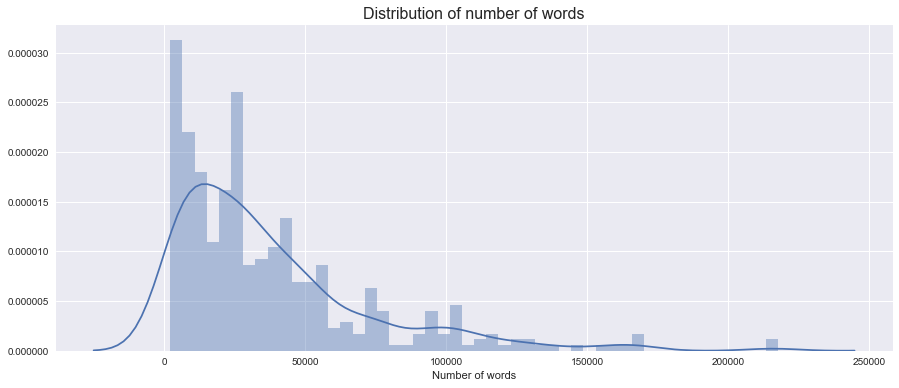

In [212]:
fig, ax = plt.subplots(figsize=(15,6))

ax.set_title("Distribution of number of words", fontsize=16)
ax.set_xlabel("Number of words")
sns.distplot(document_lengths, bins=50, ax=ax);

In [215]:
print("There are {} documents with over 150000 words.".format(sum(document_lengths > 150000)))

shorter_documents = document_lengths[document_lengths <= 150000]

There are 8 documents with over 150000 words.


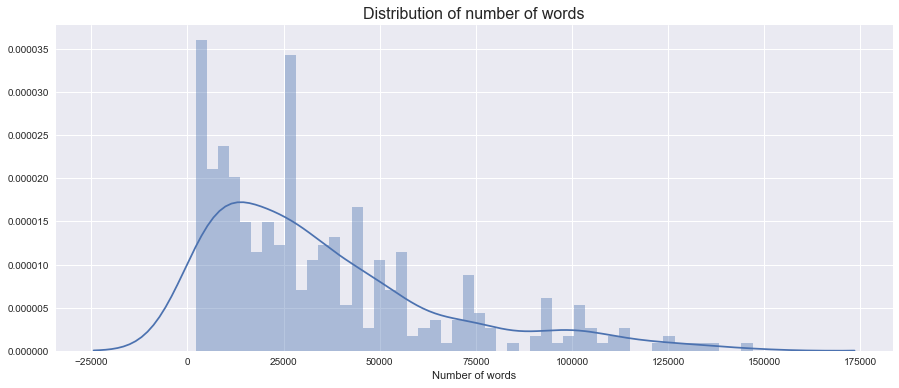

In [216]:
fig, ax = plt.subplots(figsize=(15,6))

ax.set_title("Distribution of number of words", fontsize=16)
ax.set_xlabel("Number of words")
sns.distplot(shorter_documents, bins=50, ax=ax);

In [219]:
print("There are {} documents with tops 5 words.".format(sum(document_lengths <= 2114)))

There are 1 documents with tops 5 words.


In [9]:
from nltk.tokenize import PunktSentenceTokenizer
import re
import nltk

In [10]:
tokenizer = PunktSentenceTokenizer()
def cleanup_for_word2vec(docs):
    sentences = []
    for doc in docs:
        doc = re.sub('&#39;','',doc).lower()
        doc = re.sub('[\n]', ' ', doc)
        doc = " ".join(doc.split()) 
#         doc = [word for word in doc.split() if word not in STOP_WORDS]
#         doc = " ".join(doc)
        doc = tokenizer.tokenize(doc)
        #text = [i.split() for i in text]
        doc = [re.sub("[#$%&\()*+-/:.,?!;<=>@[\\]^_`{|}~]", " ", sent) for sent in doc]
        doc = [sent.split() for sent in doc]
        sentences+=(doc)
    return sentences

In [11]:
cleaned_content_word2vec = cleanup_for_word2vec(DataTrain['NoiDungTokenize'])

In [12]:
cleaned_content_word2vec[:1]

[['august',
  '2000',
  'etext',
  '2273',
  'project',
  'gutenberg',
  'etext',
  'tom',
  'swift',
  'motor',
  'boat',
  'file',
  'named',
  '02tom10',
  'txt02tom10']]

In [13]:
from gensim.models.word2vec import Word2Vec

C:\Users\vuong.huynh\Anaconda3\lib\site-packages\gensim\utils.py:1209: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [14]:
wordvec_model = Word2Vec(cleaned_content_word2vec, iter=10, size=300, window=5, min_count=10, workers=4, sg=0)

In [15]:
wordvec_model.most_similar("great")

C:\Users\vuong.huynh\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
C:\Users\vuong.huynh\Anaconda3\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('reat', 0.7945661544799805),
 ('vast', 0.581305980682373),
 ('enormous', 0.5707581043243408),
 ('greater', 0.5222585201263428),
 ('mighty', 0.5008816123008728),
 ('greatest', 0.4954996407032013),
 ('considerable', 0.48496013879776),
 ('huge', 0.4561648964881897),
 ('mmense', 0.45545506477355957),
 ('infinite', 0.43212613463401794)]

In [16]:
print("%d unique words represented by 300 dimensional vectors" % (len(wordvec_model.wv.vocab)))

58709 unique words represented by 300 dimensional vectors


In [17]:
wordvec_model.wv.vocab

{'august': <gensim.models.keyedvectors.Vocab at 0x1e4eed72828>,
 '2000': <gensim.models.keyedvectors.Vocab at 0x1e4eed72860>,
 'etext': <gensim.models.keyedvectors.Vocab at 0x1e4eed72908>,
 'project': <gensim.models.keyedvectors.Vocab at 0x1e4eed72940>,
 'gutenberg': <gensim.models.keyedvectors.Vocab at 0x1e4eed72898>,
 'tom': <gensim.models.keyedvectors.Vocab at 0x1e4eed728d0>,
 'swift': <gensim.models.keyedvectors.Vocab at 0x1e4eed72978>,
 'motor': <gensim.models.keyedvectors.Vocab at 0x1e4eed729b0>,
 'boat': <gensim.models.keyedvectors.Vocab at 0x1e4eed729e8>,
 'file': <gensim.models.keyedvectors.Vocab at 0x1e4eed72a20>,
 'named': <gensim.models.keyedvectors.Vocab at 0x1e4eed72a58>,
 'ip': <gensim.models.keyedvectors.Vocab at 0x1e4eed72a90>,
 'corrected': <gensim.models.keyedvectors.Vocab at 0x1e4eed72ac8>,
 'editions': <gensim.models.keyedvectors.Vocab at 0x1e4eed72b00>,
 'etexts': <gensim.models.keyedvectors.Vocab at 0x1e4eed72b38>,
 'get': <gensim.models.keyedvectors.Vocab at 0x1

In [18]:
wordvec_model['program']

C:\Users\vuong.huynh\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


array([ 0.08756737, -0.4849359 ,  0.09258471,  0.5332516 , -0.83412683,
        1.4007401 , -0.21993272, -1.5946935 , -0.23268117,  0.9671646 ,
       -0.8923986 ,  1.1503458 ,  0.11310089, -1.343151  , -0.09844123,
        1.1442933 , -0.8730031 , -0.8477749 ,  0.46705672, -1.4603894 ,
       -1.6168814 , -0.6311893 ,  0.08392243, -0.44214267, -0.5048343 ,
       -1.0778183 ,  0.98268104, -0.5930208 , -0.46347964, -0.9746676 ,
        0.38000455,  1.6027899 ,  1.2293227 , -0.41387323, -0.75161576,
        0.62356627,  0.34847683, -0.73645914, -0.15048805, -1.2204477 ,
       -1.5888692 , -0.3890779 , -0.35718375, -1.0015948 , -0.09175818,
        0.6624376 ,  1.5438682 , -1.2902464 , -0.23350856,  0.31357384,
        0.3742413 ,  0.48988476,  0.575092  , -0.04045668, -0.8623304 ,
        1.8627577 ,  0.6331108 , -0.7067224 ,  0.39263186, -1.0412805 ,
       -1.5948011 ,  0.25136793,  0.12079147,  0.873189  , -0.795905  ,
        0.5019713 ,  0.49560356, -0.868278  ,  0.09348696,  0.21

In [19]:
len(wordvec_model.wv.vectors[0])

300

In [20]:
print(wordvec_model.wv.index2word[0], wordvec_model.wv.index2word[1], wordvec_model.wv.index2word[2])

de said et


In [21]:
print(wordvec_model.wv.index2word[len(wordvec_model.wv.vocab) -1], \
      wordvec_model.wv.index2word[len(wordvec_model.wv.vocab) -2], \
      wordvec_model.wv.index2word[len(wordvec_model.wv.vocab) -3])

hayter letheringham unsters


In [22]:
def create_average_vec(doc):
    average = np.zeros((text_dim,), dtype='float32')
    num_words = 0.
    for word in doc.split():
        if word in wordvec_model.wv.vocab:
            average = np.add(average, wordvec_model[word])
            num_words += 1.
    if num_words != 0.:
        average = np.divide(average, num_words)
    return average

In [23]:
average = np.zeros((300), dtype='float32')

In [24]:
class AverageEmbeddingVectorizer():
    
    def __init__(self, word2vec_model):
        self.model = word2vec_model
        self.size = len(word2vec_model.wv.vectors[0])
        self.count= 0 # for keeping count of number of words from document found inside word2vec model
        
    def fit(self, X, y):
        pass
    
    def transform(self, text):
        self.count=0
        average = np.zeros(self.size)
        for word in text.split():
            if word in self.model.wv.vocab:
                average = np.add(average, self.model[word])
                self.count += 1
        if self.count != 0:
            average = np.divide(average,self.count)
        return average

In [25]:
avvec = AverageEmbeddingVectorizer(wordvec_model)

In [26]:
x = DataTrain['NoiDungTokenize']
y = DataTrain['TacGia']

In [27]:
#creating an initial empty matrix of the size of the training set with word@vec model shape
trained_wordvec = np.zeros((x.shape[0], len(wordvec_model.wv.vectors[0])), dtype= 'float64')
trained_wordvec.shape

(401, 300)

In [28]:
avvec = AverageEmbeddingVectorizer(wordvec_model)
for i in range(x.shape[0]):
    trained_wordvec[i] = avvec.transform(x.iloc[i])

C:\Users\vuong.huynh\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  app.launch_new_instance()


In [47]:
#from sklearn.preprocessing import LabelEncoder
#le = LabelEncoder()
#y = le.fit_transform(y)

In [30]:
from sklearn.model_selection import train_test_split
xtrainWV, xtestWV, ytrainWV, ytestWV = train_test_split(trained_wordvec, y, test_size = 0.2,random_state=100)
xtrainWV.shape, ytrainWV.shape, xtestWV.shape, ytestWV.shape

((320, 300), (320,), (81, 300), (81,))

### a. Naive baye 

In [31]:
from sklearn.preprocessing import MinMaxScaler
scalerWV = MinMaxScaler()
scalerWV.fit(trained_wordvec)
X_train_scalerWV = scalerWV.transform(xtrainWV)
X_test_scalerWV = scalerWV.transform(xtestWV)

In [34]:
from sklearn.naive_bayes import MultinomialNB
MulNB_WV = MultinomialNB()
MulNB_WV.fit(X_train_scalerWV,ytrainWV)
PreMulNB_WV = MulNB_WV.predict(X_test_scalerWV)
from sklearn.metrics import classification_report
print(classification_report(ytestWV, PreMulNB_WV))

                       precision    recall  f1-score   support

            Anonymous       0.33      0.33      0.33         3
         David Widger       0.83      1.00      0.91         5
E. Phillips Oppenheim       1.00      1.00      1.00         4
 Edgar Rice Burroughs       0.80      1.00      0.89         4
 Edward Bulwer Lytton       1.00      0.40      0.57         5
    Huguette Bertrand       1.00      0.80      0.89         5
        L. Frank Baum       1.00      1.00      1.00         4
    Mrs. Humphry Ward       0.67      0.67      0.67         6
          Oscar Wilde       1.00      0.50      0.67         2
           Paul Heyse       0.00      0.00      0.00         5
     Sir Walter Scott       1.00      1.00      1.00         5
        Theodor Storm       0.44      1.00      0.62         4
     Thomas H. Huxley       0.75      1.00      0.86         3
       Upton Sinclair       1.00      0.71      0.83         7
      Victor Appleton       1.00      1.00      1.00  

C:\Users\vuong.huynh\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [35]:
from sklearn.naive_bayes import GaussianNB
gnb_WV = GaussianNB()
pr_WV = gnb_WV.fit(xtrainWV,ytrainWV)
pr_WV = gnb_WV.predict(xtestWV)
print(classification_report(ytestWV, pr_WV))

                       precision    recall  f1-score   support

            Anonymous       0.29      0.67      0.40         3
         David Widger       0.83      1.00      0.91         5
E. Phillips Oppenheim       1.00      0.75      0.86         4
 Edgar Rice Burroughs       1.00      1.00      1.00         4
 Edward Bulwer Lytton       0.60      0.60      0.60         5
    Huguette Bertrand       1.00      1.00      1.00         5
        L. Frank Baum       1.00      1.00      1.00         4
    Mrs. Humphry Ward       1.00      0.67      0.80         6
          Oscar Wilde       0.50      0.50      0.50         2
           Paul Heyse       0.00      0.00      0.00         5
     Sir Walter Scott       1.00      1.00      1.00         5
        Theodor Storm       0.44      1.00      0.62         4
     Thomas H. Huxley       1.00      0.67      0.80         3
       Upton Sinclair       0.88      1.00      0.93         7
      Victor Appleton       1.00      1.00      1.00  

C:\Users\vuong.huynh\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### b. Decision Tree 

In [37]:
from sklearn import tree
clf_tree_WV= tree.DecisionTreeClassifier()
clf_tree_WV.fit(xtrainWV,ytrainWV)
Pre_tree_WV= clf_tree_WV.predict(xtestWV)
from sklearn.metrics import classification_report
print(classification_report(ytestWV, Pre_tree_WV))

                       precision    recall  f1-score   support

            Anonymous       0.50      0.67      0.57         3
         David Widger       1.00      0.40      0.57         5
E. Phillips Oppenheim       1.00      0.75      0.86         4
 Edgar Rice Burroughs       0.50      1.00      0.67         4
 Edward Bulwer Lytton       0.71      1.00      0.83         5
    Huguette Bertrand       0.71      1.00      0.83         5
        L. Frank Baum       0.75      0.75      0.75         4
    Mrs. Humphry Ward       1.00      1.00      1.00         6
          Oscar Wilde       0.33      0.50      0.40         2
           Paul Heyse       1.00      1.00      1.00         5
     Sir Walter Scott       1.00      1.00      1.00         5
        Theodor Storm       1.00      1.00      1.00         4
     Thomas H. Huxley       0.67      0.67      0.67         3
       Upton Sinclair       1.00      0.71      0.83         7
      Victor Appleton       1.00      1.00      1.00  

### c. Random Forest 

In [38]:
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

RanDom_modelWV = RandomForestClassifier(n_estimators=100, random_state=100)

RanDom_modelWV.fit(xtrainWV,ytrainWV)
prRanDom_WV = RanDom_modelWV.predict(xtestWV)
print(classification_report(ytestWV, prRanDom_WV ))

                       precision    recall  f1-score   support

            Anonymous       0.67      0.67      0.67         3
         David Widger       1.00      1.00      1.00         5
E. Phillips Oppenheim       1.00      1.00      1.00         4
 Edgar Rice Burroughs       1.00      1.00      1.00         4
 Edward Bulwer Lytton       0.83      1.00      0.91         5
    Huguette Bertrand       1.00      1.00      1.00         5
        L. Frank Baum       1.00      1.00      1.00         4
    Mrs. Humphry Ward       1.00      1.00      1.00         6
          Oscar Wilde       0.50      0.50      0.50         2
           Paul Heyse       1.00      0.60      0.75         5
     Sir Walter Scott       1.00      1.00      1.00         5
        Theodor Storm       0.67      1.00      0.80         4
     Thomas H. Huxley       0.75      1.00      0.86         3
       Upton Sinclair       1.00      1.00      1.00         7
      Victor Appleton       1.00      1.00      1.00  

### d. Support Vector Machine

In [39]:
from sklearn.svm import SVC
clf_SVM_WV = SVC()
clf_SVM_WV.fit(xtrainWV,ytrainWV)
Pre_SVM_WV = clf_SVM_WV.predict(xtestWV)
print(classification_report(ytestWV, Pre_SVM_WV))

                       precision    recall  f1-score   support

            Anonymous       0.00      0.00      0.00         3
         David Widger       0.00      0.00      0.00         5
E. Phillips Oppenheim       0.00      0.00      0.00         4
 Edgar Rice Burroughs       0.00      0.00      0.00         4
 Edward Bulwer Lytton       0.00      0.00      0.00         5
    Huguette Bertrand       0.38      1.00      0.56         5
        L. Frank Baum       0.00      0.00      0.00         4
    Mrs. Humphry Ward       0.00      0.00      0.00         6
          Oscar Wilde       0.00      0.00      0.00         2
           Paul Heyse       0.00      0.00      0.00         5
     Sir Walter Scott       0.00      0.00      0.00         5
        Theodor Storm       0.44      1.00      0.62         4
     Thomas H. Huxley       0.00      0.00      0.00         3
       Upton Sinclair       0.00      0.00      0.00         7
      Victor Appleton       0.04      1.00      0.07  

C:\Users\vuong.huynh\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [ ]:
#xtrainWV, xtestWV, ytrainWV, ytestWV = train_test_split(trained_wordvec, y, test_size = 0.2)

### e. Convolution Neural Network 

In [40]:
from sklearn.preprocessing import LabelEncoder
lblEncoder_WV=LabelEncoder()
y_trainEncoder_WV = lblEncoder_WV.fit_transform(ytrainWV)
y_testEncoder_WV=lblEncoder_WV.transform(ytestWV)
from keras import utils as np_utils
y_trainEC_WV = np_utils.to_categorical(y_trainEncoder_WV,18)
y_testEC_WV = np_utils.to_categorical(y_testEncoder_WV,18)

C:\Users\vuong.huynh\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [41]:
#from keras import utils as np_utils
#y_trainEC_WV = np_utils.to_categorical(ytrainWV,18)
#y_testEC_WV = np_utils.to_categorical( ytestWV,18)

In [42]:
# build model
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Conv1D, GlobalMaxPooling1D
from keras import metrics

modelWV1 = Sequential()
modelWV1.add(Dense(64,input_shape=(300,)))
modelWV1.add(Dropout(0.2))
modelWV1.add(Activation('relu'))
modelWV1.add(Dense(64))
modelWV1.add(Dropout(0.2))
modelWV1.add(Activation('relu'))
modelWV1.add(Dense(18))
modelWV1.add(Activation('sigmoid'))
modelWV1.summary()
modelWV1.compile(loss='binary_crossentropy',optimizer='adam',metrics=['acc'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                19264     
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
activation_1 (Activation)    (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
activation_2 (Activation)    (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 18)                1170      
__________

In [43]:
modelWV1.fit(xtrainWV,y_trainEC_WV,batch_size=32,epochs=10,verbose=1,validation_data=(xtestWV, y_testEC_WV))

Train on 320 samples, validate on 81 samples
Epoch 1/10
320/320 [==============================] - 5s 14ms/step - loss: 0.5916 - acc: 0.7530 - val_loss: 0.4717 - val_acc: 0.9294
Epoch 2/10
320/320 [==============================] - 0s 150us/step - loss: 0.4056 - acc: 0.8997 - val_loss: 0.2820 - val_acc: 0.9383
Epoch 3/10
320/320 [==============================] - 0s 181us/step - loss: 0.2686 - acc: 0.9318 - val_loss: 0.2073 - val_acc: 0.9444
Epoch 4/10
320/320 [==============================] - 0s 137us/step - loss: 0.2336 - acc: 0.9420 - val_loss: 0.1968 - val_acc: 0.9444
Epoch 5/10
320/320 [==============================] - 0s 131us/step - loss: 0.2246 - acc: 0.9425 - val_loss: 0.1795 - val_acc: 0.9444
Epoch 6/10
320/320 [==============================] - 0s 125us/step - loss: 0.2023 - acc: 0.9429 - val_loss: 0.1712 - val_acc: 0.9486
Epoch 7/10
320/320 [==============================] - 0s 131us/step - loss: 0.1958 - acc: 0.9425 - val_loss: 0.1672 - val_acc: 0.9444
Epoch 8/10
320/320

In [44]:
from keras import metrics
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Conv1D, GlobalMaxPooling1D
modelWV2 = Sequential()
modelWV2.add(Dense(512, activation='relu', input_shape=(300,)))
modelWV2.add(Dropout(0.2))
modelWV2.add(Dense(512, activation='relu'))
#modelWV2.add(Dropout(0.2))
modelWV2.add(Dense(18, activation='sigmoid'))
modelWV2.summary()
modelWV2.compile(loss='binary_crossentropy', optimizer='adam',metrics=['acc',metrics.binary_accuracy])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 512)               154112    
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_6 (Dense)              (None, 18)                9234      
Total params: 426,002
Trainable params: 426,002
Non-trainable params: 0
_________________________________________________________________


In [45]:
modelWV2.fit(xtrainWV,y_trainEC_WV,batch_size=32,epochs=10,verbose=1,validation_data=(xtestWV, y_testEC_WV))

Train on 320 samples, validate on 81 samples
Epoch 1/10
320/320 [==============================] - 0s 1ms/step - loss: 0.4041 - acc: 0.8561 - binary_accuracy: 0.8561 - val_loss: 0.2025 - val_acc: 0.9444 - val_binary_accuracy: 0.9444
Epoch 2/10
320/320 [==============================] - 0s 171us/step - loss: 0.2103 - acc: 0.9446 - binary_accuracy: 0.9446 - val_loss: 0.1766 - val_acc: 0.9479 - val_binary_accuracy: 0.9479
Epoch 3/10
320/320 [==============================] - 0s 178us/step - loss: 0.1734 - acc: 0.9450 - binary_accuracy: 0.9450 - val_loss: 0.1589 - val_acc: 0.9465 - val_binary_accuracy: 0.9465
Epoch 4/10
320/320 [==============================] - 0s 159us/step - loss: 0.1526 - acc: 0.9486 - binary_accuracy: 0.9486 - val_loss: 0.1425 - val_acc: 0.9520 - val_binary_accuracy: 0.9520
Epoch 5/10
320/320 [==============================] - 0s 178us/step - loss: 0.1364 - acc: 0.9521 - binary_accuracy: 0.9521 - val_loss: 0.1304 - val_acc: 0.9547 - val_binary_accuracy: 0.9547
Epoch 6

In [46]:
from sklearn.preprocessing import MinMaxScaler
scalerWV = MinMaxScaler()
scalerWV.fit(trained_wordvec)
X_train_scalerWV = scalerWV.transform(xtrainWV)
X_test_scalerWV = scalerWV.transform(xtestWV)

In [47]:
print(X_train_scalerWV)

[[0.65871783 0.4153384  0.139356   ... 0.17672267 0.18855715 0.31287206]
 [0.61782196 0.3749784  0.15806312 ... 0.16158965 0.20637207 0.24548917]
 [0.61222119 0.64080811 0.24376759 ... 0.15161288 0.12136043 0.20969347]
 ...
 [0.57369761 0.38193335 0.09579273 ... 0.15970339 0.12182939 0.16886045]
 [0.36307916 0.29185457 0.13343237 ... 0.17988794 0.08178774 0.16475234]
 [0.95653338 0.8708767  0.43017944 ... 0.1621884  0.27900931 0.26391935]]


In [48]:
from keras import metrics
model4 = Sequential()
model4.add(Dense(512, activation='relu', input_shape=(300,)))
model4.add(Dropout(0.2))
model4.add(Dense(512, activation='relu'))
model4.add(Dropout(0.2))
model4.add(Dense(18, activation='sigmoid'))
model4.summary()
model4.compile(loss='binary_crossentropy', optimizer='adam',metrics=['acc',metrics.binary_accuracy])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 512)               154112    
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_5 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 18)                9234      
Total params: 426,002
Trainable params: 426,002
Non-trainable params: 0
_________________________________________________________________


In [49]:
model4.fit(X_train_scalerWV,y_trainEC_WV,batch_size=32,epochs=10,verbose=1,validation_data=(X_test_scalerWV, y_testEC_WV))

Train on 320 samples, validate on 81 samples
Epoch 1/10
320/320 [==============================] - 1s 2ms/step - loss: 0.3446 - acc: 0.8828 - binary_accuracy: 0.8828 - val_loss: 0.2591 - val_acc: 0.9444 - val_binary_accuracy: 0.9444
Epoch 2/10
320/320 [==============================] - 0s 168us/step - loss: 0.2245 - acc: 0.9443 - binary_accuracy: 0.9443 - val_loss: 0.1894 - val_acc: 0.9424 - val_binary_accuracy: 0.9424
Epoch 3/10
320/320 [==============================] - 0s 203us/step - loss: 0.1966 - acc: 0.9448 - binary_accuracy: 0.9448 - val_loss: 0.1748 - val_acc: 0.9424 - val_binary_accuracy: 0.9424
Epoch 4/10
320/320 [==============================] - 0s 159us/step - loss: 0.1816 - acc: 0.9441 - binary_accuracy: 0.9441 - val_loss: 0.1669 - val_acc: 0.9451 - val_binary_accuracy: 0.9451
Epoch 5/10
320/320 [==============================] - 0s 156us/step - loss: 0.1743 - acc: 0.9458 - binary_accuracy: 0.9458 - val_loss: 0.1614 - val_acc: 0.9472 - val_binary_accuracy: 0.9472
Epoch 6

## 3.2 Doc2Vec

In [117]:
from gensim import utils
from gensim.models.doc2vec import LabeledSentence
from gensim.models import Doc2Vec
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
import re

In [121]:
w = re.compile("\w+",re.I)

In [118]:
def label_sentences(df):
    labeled_sentences = []
    for index, datapoint in df.iterrows():
        tokenized_words = re.findall(w,datapoint['NoiDungTokenize'].lower())
        labeled_sentences.append(LabeledSentence(words=tokenized_words, tags=['SENT_%s' %index]))
    return labeled_sentences

In [119]:
def train_doc2vec_model(labeled_sentences):
    model = Doc2Vec(alpha=0.025, min_alpha=0.025)
    model.build_vocab(labeled_sentences)
    for epoch in range(10):
        model.train(labeled_sentences)
        model.alpha -= 0.002 
        model.min_alpha = model.alpha
    
    return model

In [122]:
sen = label_sentences(DataTrain)

C:\Users\vuong.huynh\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `LabeledSentence` (Class will be removed in 4.0.0, use TaggedDocument instead).
  """


In [132]:
sen[:1]

[LabeledSentence(words=['august', '2000', 'etext', '2273', 'project', 'gutenberg', 'etext', 'tom', 'swift', 'motor', 'boat', 'file', 'named', '02tom10', 'txt', '02tom10', 'zip', 'corrected', 'editions', 'etexts', 'get', 'new', 'number', '02tom11', 'txt', 'versions', 'based', 'separate', 'sources', 'get', 'new', 'letter', '02tom10a', 'txt', 'etext', 'prepared', 'project', 'gutenberg', 'ronald', 'benninghoff', 'proof', 'read', 'erin', 'hartshorn', 'george', 'joseph', 'trying', 'release', 'books', 'one', 'month', 'advance', 'official', 'release', 'dates', 'time', 'better', 'editing', 'please', 'note', 'neither', 'list', 'contents', 'final', 'till', 'midnight', 'last', 'day', 'month', 'announcement', 'official', 'release', 'date', 'project', 'gutenberg', 'etexts', 'midnight', 'central', 'time', 'last', 'day', 'stated', 'month', 'preliminary', 'version', 'may', 'often', 'posted', 'suggestion', 'comment', 'editing', 'wish', 'sure', 'date', 'first', 'edition', 'xxxxx10x', 'xxx', 'please', 'ch

In [124]:
modelD2V = Doc2Vec(size=300, window=10, min_count=5, workers=11,alpha=0.025, min_alpha=0.025) # use fixed learning rate) 
modelD2V.build_vocab(sen)
modelD2V.train(sen, total_examples= 500, epochs=10)

C:\Users\vuong.huynh\Anaconda3\lib\site-packages\gensim\models\doc2vec.py:535: UserWarning: The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.
  warnings.warn("The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.")


In [137]:
def vectorize_comments(df,d2v_model):
    y = []
    comments = []
    for i in range(0,df.shape[0]):
        label = 'SENT_%s' %i
        comments.append(d2v_model.docvecs[label])
    df['vectorized_comments'] = comments
    
    return df

DataTrain = vectorize_comments(DataTrain,modelD2V)


In [138]:
DataTrain.head()

,Unnamed: 0,TacGia,NoiDung,NoiDung1,NoiDungTokenize,vectorized_comments
0,2,Victor Appleton,august 2000 [etext 2273] the project gute...,"\r\naugust, 2000 [etext 2273]\r\n\r\n\r\nthe ...",august 2000 [etext 2273] project gutenberg ete...,"[-1.6032224, -1.7793933, -3.52059, 0.6259882, ..."
1,351,Edgar Rice Burroughs,(8 in the tarzan tales by edgar rice burroughs...,(8 in the tarzan tales by edgar rice burroughs...,(8 tarzan tales edgar rice burroughs) copyrigh...,"[1.5870595, 0.6775027, -1.6985799, 0.5388862, ..."
2,364,Oscar Wilde,february 2000 [etext 2061] project gutenbe...,"\r\nfebruary, 2000 [etext 2061]\r\n\r\n\r\npro...",february 2000 [etext 2061] project gutenbergs ...,"[1.5902445, -1.4849741, -1.1324769, 0.43836698..."
3,497,E. Phillips Oppenheim,august 2001 [etext 2767] [date last updated...,"\r\naugust, 2001 [etext 2767]\r\n[date last u...",august 2001 [etext 2767] [date last updated: f...,"[-1.2384834, 3.0057123, 3.4141765, -1.490782, ..."
4,523,Sir Walter Scott,april 2001 [etext 2590] the project guten...,"\r\napril, 2001 [etext 2590]\r\n\r\n\r\nthe p...",april 2001 [etext 2590] project gutenberg etex...,"[-1.9728776, 1.2114428, -0.19501966, -0.951878..."


In [142]:
xD2V = DataTrain["vectorized_comments"].T.tolist()
yD2V = DataTrain['TacGia']

In [144]:
xtrainDV, xtestDV, ytrainDV, ytestDV = train_test_split(xD2V, yD2V, test_size = 0.2,random_state=100)
#xtrainDV.shape, ytrainDV.shape, xtestDV.shape, ytestDV.shape

### a. Naive Baye

In [185]:
from sklearn.preprocessing import MinMaxScaler
scalerDV = MinMaxScaler()
scalerDV.fit(xD2V)
X_train_scalerDV = scalerDV.transform(xtrainDV)
X_test_scalerDV = scalerDV.transform(xtestDV)

In [186]:
from sklearn.naive_bayes import MultinomialNB
MulNB_DV = MultinomialNB()
MulNB_DV.fit(X_train_scalerDV,ytrainDV)
PreMulNB_DV = MulNB_DV.predict(X_test_scalerDV)
from sklearn.metrics import classification_report
print(classification_report(ytestDV, prRanDom_DV))

                       precision    recall  f1-score   support

            Anonymous       1.00      0.67      0.80         3
         David Widger       0.83      1.00      0.91         5
E. Phillips Oppenheim       0.80      1.00      0.89         4
 Edgar Rice Burroughs       0.80      1.00      0.89         4
 Edward Bulwer Lytton       1.00      1.00      1.00         5
    Huguette Bertrand       0.83      1.00      0.91         5
        L. Frank Baum       1.00      1.00      1.00         4
    Mrs. Humphry Ward       1.00      1.00      1.00         6
          Oscar Wilde       0.67      1.00      0.80         2
           Paul Heyse       1.00      1.00      1.00         5
     Sir Walter Scott       0.71      1.00      0.83         5
        Theodor Storm       1.00      1.00      1.00         4
     Thomas H. Huxley       1.00      1.00      1.00         3
       Upton Sinclair       1.00      0.71      0.83         7
      Victor Appleton       0.67      1.00      0.80  

In [155]:
from sklearn.naive_bayes import GaussianNB
gnb_DV = GaussianNB()
pr_DV = gnb_DV.fit(xtrainDV,ytrainDV)
pr_DV = gnb_DV.predict(xtestDV)
print(classification_report(ytestDV, pr_DV))

                       precision    recall  f1-score   support

            Anonymous       0.50      1.00      0.67         3
         David Widger       0.83      1.00      0.91         5
E. Phillips Oppenheim       1.00      1.00      1.00         4
 Edgar Rice Burroughs       1.00      1.00      1.00         4
 Edward Bulwer Lytton       1.00      1.00      1.00         5
    Huguette Bertrand       1.00      1.00      1.00         5
        L. Frank Baum       1.00      1.00      1.00         4
    Mrs. Humphry Ward       1.00      1.00      1.00         6
          Oscar Wilde       0.67      1.00      0.80         2
           Paul Heyse       1.00      1.00      1.00         5
     Sir Walter Scott       1.00      1.00      1.00         5
        Theodor Storm       1.00      1.00      1.00         4
     Thomas H. Huxley       1.00      0.67      0.80         3
       Upton Sinclair       1.00      1.00      1.00         7
      Victor Appleton       1.00      1.00      1.00  

### b. Decision Tree 

In [149]:
from sklearn import tree
clf_tree_DV= tree.DecisionTreeClassifier()
clf_tree_DV.fit(xtrainDV,ytrainDV)
Pre_tree_DV= clf_tree_DV.predict(xtestDV)
from sklearn.metrics import classification_report
print(classification_report(ytestDV, prRanDom_DV ))

                       precision    recall  f1-score   support

            Anonymous       1.00      0.67      0.80         3
         David Widger       0.83      1.00      0.91         5
E. Phillips Oppenheim       0.80      1.00      0.89         4
 Edgar Rice Burroughs       0.80      1.00      0.89         4
 Edward Bulwer Lytton       1.00      1.00      1.00         5
    Huguette Bertrand       0.83      1.00      0.91         5
        L. Frank Baum       1.00      1.00      1.00         4
    Mrs. Humphry Ward       1.00      1.00      1.00         6
          Oscar Wilde       0.67      1.00      0.80         2
           Paul Heyse       1.00      1.00      1.00         5
     Sir Walter Scott       0.71      1.00      0.83         5
        Theodor Storm       1.00      1.00      1.00         4
     Thomas H. Huxley       1.00      1.00      1.00         3
       Upton Sinclair       1.00      0.71      0.83         7
      Victor Appleton       0.67      1.00      0.80  

### c. Random Forest 

In [145]:
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

RanDom_modelDV = RandomForestClassifier(n_estimators=100, random_state=100)

RanDom_modelDV.fit(xtrainDV,ytrainDV)
prRanDom_DV = RanDom_modelDV.predict(xtestDV)
print(classification_report(ytestDV, prRanDom_DV ))

                       precision    recall  f1-score   support

            Anonymous       1.00      0.67      0.80         3
         David Widger       0.83      1.00      0.91         5
E. Phillips Oppenheim       0.80      1.00      0.89         4
 Edgar Rice Burroughs       0.80      1.00      0.89         4
 Edward Bulwer Lytton       1.00      1.00      1.00         5
    Huguette Bertrand       0.83      1.00      0.91         5
        L. Frank Baum       1.00      1.00      1.00         4
    Mrs. Humphry Ward       1.00      1.00      1.00         6
          Oscar Wilde       0.67      1.00      0.80         2
           Paul Heyse       1.00      1.00      1.00         5
     Sir Walter Scott       0.71      1.00      0.83         5
        Theodor Storm       1.00      1.00      1.00         4
     Thomas H. Huxley       1.00      1.00      1.00         3
       Upton Sinclair       1.00      0.71      0.83         7
      Victor Appleton       0.67      1.00      0.80  

### d. Support Vector Machine 

In [156]:
from sklearn.svm import SVC
clf_SVM_DV = SVC()
clf_SVM_DV.fit(xtrainDV,ytrainDV)
Pre_SVM_DV = clf_SVM_DV.predict(xtestDV)
print(classification_report(ytestDV, prRanDom_DV ))

                       precision    recall  f1-score   support

            Anonymous       1.00      0.67      0.80         3
         David Widger       0.83      1.00      0.91         5
E. Phillips Oppenheim       0.80      1.00      0.89         4
 Edgar Rice Burroughs       0.80      1.00      0.89         4
 Edward Bulwer Lytton       1.00      1.00      1.00         5
    Huguette Bertrand       0.83      1.00      0.91         5
        L. Frank Baum       1.00      1.00      1.00         4
    Mrs. Humphry Ward       1.00      1.00      1.00         6
          Oscar Wilde       0.67      1.00      0.80         2
           Paul Heyse       1.00      1.00      1.00         5
     Sir Walter Scott       0.71      1.00      0.83         5
        Theodor Storm       1.00      1.00      1.00         4
     Thomas H. Huxley       1.00      1.00      1.00         3
       Upton Sinclair       1.00      0.71      0.83         7
      Victor Appleton       0.67      1.00      0.80  

### e. Convolution Neural Network 

In [157]:
from sklearn.preprocessing import LabelEncoder
lblEncoder_DV=LabelEncoder()
y_trainEncoder_DV = lblEncoder_DV.fit_transform(ytrainDV)
y_testEncoder_DV=lblEncoder_DV.transform(ytestDV)
from keras import utils as np_utils
y_trainEC_DV = np_utils.to_categorical(y_trainEncoder_DV,18)
y_testEC_DV = np_utils.to_categorical(y_testEncoder_DV,18)

In [167]:
# build model
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Conv1D, GlobalMaxPooling1D
from keras import metrics

modelDV1 = Sequential()
modelDV1.add(Dense(64,input_shape=(300,)))
modelDV1.add(Dropout(0.2))
modelDV1.add(Activation('relu'))
modelDV1.add(Dense(64))
modelDV1.add(Dropout(0.2))
modelDV1.add(Activation('relu'))
modelDV1.add(Dense(18))
modelDV1.add(Activation('sigmoid'))
modelDV1.summary()
modelDV1.compile(loss='binary_crossentropy',optimizer='adam',metrics=['acc'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_45 (Dense)             (None, 64)                19264     
_________________________________________________________________
dropout_28 (Dropout)         (None, 64)                0         
_________________________________________________________________
activation_10 (Activation)   (None, 64)                0         
_________________________________________________________________
dense_46 (Dense)             (None, 64)                4160      
_________________________________________________________________
dropout_29 (Dropout)         (None, 64)                0         
_________________________________________________________________
activation_11 (Activation)   (None, 64)                0         
_________________________________________________________________
dense_47 (Dense)             (None, 18)                1170      
__________

In [168]:
arTr = np.array(xtrainDV)

In [169]:
arTe = np.array(xtestDV)

In [170]:
modelDV1.fit(arTr,y_trainEC_DV,batch_size=32,epochs=10,verbose=1,validation_data=(arTe, y_testEC_DV))

Train on 320 samples, validate on 81 samples
Epoch 1/10
320/320 [==============================] - 5s 15ms/step - loss: 0.6674 - acc: 0.6606 - val_loss: 0.4017 - val_acc: 0.8525
Epoch 2/10
320/320 [==============================] - 0s 240us/step - loss: 0.3729 - acc: 0.8536 - val_loss: 0.2499 - val_acc: 0.9287
Epoch 3/10
320/320 [==============================] - 0s 184us/step - loss: 0.2618 - acc: 0.9222 - val_loss: 0.2111 - val_acc: 0.9444
Epoch 4/10
320/320 [==============================] - 0s 209us/step - loss: 0.2306 - acc: 0.9377 - val_loss: 0.1932 - val_acc: 0.9451
Epoch 5/10
320/320 [==============================] - 0s 153us/step - loss: 0.2101 - acc: 0.9408 - val_loss: 0.1743 - val_acc: 0.9451
Epoch 6/10
320/320 [==============================] - 0s 143us/step - loss: 0.1806 - acc: 0.9458 - val_loss: 0.1568 - val_acc: 0.9472
Epoch 7/10
320/320 [==============================] - 0s 153us/step - loss: 0.1601 - acc: 0.9486 - val_loss: 0.1405 - val_acc: 0.9486
Epoch 8/10
320/320

In [180]:
from keras import metrics
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Conv1D, GlobalMaxPooling1D
modelDV2 = Sequential()
modelDV2.add(Dense(512, activation='relu', input_shape=(300,)))
modelDV2.add(Dropout(0.2))
modelDV2.add(Dense(512, activation='relu'))
#modelWV2.add(Dropout(0.2))
modelDV2.add(Dense(18, activation='sigmoid'))
modelDV2.summary()
modelDV2.compile(loss='binary_crossentropy', optimizer='adam',metrics=['acc',metrics.binary_accuracy])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_64 (Dense)             (None, 512)               154112    
_________________________________________________________________
dropout_36 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_65 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_66 (Dense)             (None, 18)                9234      
Total params: 426,002
Trainable params: 426,002
Non-trainable params: 0
_________________________________________________________________


In [181]:
modelDV2.fit(arTr,y_trainEC_WV,batch_size=32,epochs=10,verbose=1,validation_data=(arTe, y_testEC_WV))

Train on 320 samples, validate on 81 samples
Epoch 1/10
320/320 [==============================] - 1s 4ms/step - loss: 0.3605 - acc: 0.8818 - binary_accuracy: 0.8818 - val_loss: 0.2933 - val_acc: 0.9444 - val_binary_accuracy: 0.9444
Epoch 2/10
320/320 [==============================] - 0s 240us/step - loss: 0.2133 - acc: 0.9444 - binary_accuracy: 0.9444 - val_loss: 0.2511 - val_acc: 0.9431 - val_binary_accuracy: 0.9431
Epoch 3/10
320/320 [==============================] - 0s 178us/step - loss: 0.1659 - acc: 0.9464 - binary_accuracy: 0.9464 - val_loss: 0.2445 - val_acc: 0.9424 - val_binary_accuracy: 0.9424
Epoch 4/10
320/320 [==============================] - 0s 190us/step - loss: 0.1344 - acc: 0.9493 - binary_accuracy: 0.9493 - val_loss: 0.2666 - val_acc: 0.9369 - val_binary_accuracy: 0.9369
Epoch 5/10
320/320 [==============================] - 0s 156us/step - loss: 0.1108 - acc: 0.9561 - binary_accuracy: 0.9561 - val_loss: 0.2799 - val_acc: 0.9355 - val_binary_accuracy: 0.9355
Epoch 6

In [187]:
from keras import metrics
modelDV4 = Sequential()
modelDV4.add(Dense(512, activation='relu', input_shape=(300,)))
modelDV4.add(Dropout(0.2))
modelDV4.add(Dense(512, activation='relu'))
modelDV4.add(Dropout(0.2))
modelDV4.add(Dense(18, activation='sigmoid'))
modelDV4.summary()
modelDV4.compile(loss='binary_crossentropy', optimizer='adam',metrics=['acc',metrics.binary_accuracy])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_70 (Dense)             (None, 512)               154112    
_________________________________________________________________
dropout_39 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_71 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_40 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_72 (Dense)             (None, 18)                9234      
Total params: 426,002
Trainable params: 426,002
Non-trainable params: 0
_________________________________________________________________


In [188]:
modelDV4.fit(X_train_scalerDV,y_trainEC_DV,batch_size=32,epochs=10,verbose=1,validation_data=(X_test_scalerDV, y_testEC_DV))

Train on 320 samples, validate on 81 samples
Epoch 1/10
320/320 [==============================] - 1s 4ms/step - loss: 0.3542 - acc: 0.8752 - binary_accuracy: 0.8752 - val_loss: 0.2860 - val_acc: 0.9444 - val_binary_accuracy: 0.9444
Epoch 2/10
320/320 [==============================] - 0s 206us/step - loss: 0.2465 - acc: 0.9444 - binary_accuracy: 0.9444 - val_loss: 0.2280 - val_acc: 0.9444 - val_binary_accuracy: 0.9444
Epoch 3/10
320/320 [==============================] - 0s 181us/step - loss: 0.2204 - acc: 0.9444 - binary_accuracy: 0.9444 - val_loss: 0.2121 - val_acc: 0.9444 - val_binary_accuracy: 0.9444
Epoch 4/10
320/320 [==============================] - 0s 184us/step - loss: 0.2148 - acc: 0.9444 - binary_accuracy: 0.9444 - val_loss: 0.2081 - val_acc: 0.9444 - val_binary_accuracy: 0.9444
Epoch 5/10
320/320 [==============================] - 0s 171us/step - loss: 0.2067 - acc: 0.9444 - binary_accuracy: 0.9444 - val_loss: 0.2054 - val_acc: 0.9444 - val_binary_accuracy: 0.9444
Epoch 6

# 4. Latent Dirichlet Allocation 

In [94]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [95]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [96]:
document = DataTrain['NoiDungTokenize']

In [97]:
#LDA có thể sử dụng CountVectorizer cho LDA vì đây là mô hình xác suất
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=1000, stop_words='english')
tf = tf_vectorizer.fit_transform(document)
tf_feature_names = tf_vectorizer.get_feature_names()

In [98]:
# Run LDA
lda = LatentDirichletAllocation(n_topics=10, max_iter=5, learning_method='online', learning_offset=50.,random_state=0).fit(tf)

C:\Users\vuong.huynh\Anaconda3\lib\site-packages\sklearn\decomposition\online_lda.py:294: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


In [99]:
no_top_words = 10
display_topics(lda, tf_feature_names, no_top_words)

Topic 0:
said thou thee thy king man came god great shall
Topic 1:
la le et les il que qui des en ce
Topic 2:
mr etext la le et said tom il man les
Topic 3:
und die der ich sie er den zu das nicht
Topic 4:
life said man great old world men things little art
Topic 5:
la et le les que des qui vous du hugo
Topic 6:
tarzan man laura great little ape saw came girl eyes
Topic 7:
tom mr ned said man damon going swift asked young
Topic 8:
said little man mr come asked think eyes room looked
Topic 9:
said mr man lady little say room mrs house looked


# 5. Non-Negative Matrix Factorization

In [100]:
from sklearn.decomposition import NMF

In [101]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [102]:
document = DataTrain['NoiDungTokenize']

In [103]:
# NMF su dung tf-idf
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, max_features=1000, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(document)
tfidf_feature_names = tfidf_vectorizer.get_feature_names()

In [104]:
# Run NMF
nmf = NMF(n_components=10, random_state=1, alpha=.1, l1_ratio=.5, init='nndsvd').fit(tfidf)

In [105]:
no_top_words = 10
display_topics(nmf, tfidf_feature_names, no_top_words)

Topic 0:
said man little come eyes looked room came asked think
Topic 1:
und der sie ich das zu die er nicht auf
Topic 2:
le la les dans des et sur en que du
Topic 3:
tom ned damon mr inventor swift cried going asked big
Topic 4:
life great world man old things art men little greek
Topic 5:
thou thy thee said king hath god lord till thine
Topic 6:
dorothy said magic king asked girl princess replied lion big
Topic 7:
etext etexts man great nature archive living foundation knowledge science
Topic 8:
tarzan ape man lion great saw girl tree village came
Topic 9:
mr mrs lord lady miss sir ebook dear say london
